# **Project Name - Retail Sales Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** - Shahnawaz Hussain



# **Project Summary -**



Rossman Sales Prediction data is a data set that contains historical sales data for a retail store chain. The data includes information about the store, such as Competitiors Details, type, and holidays, as well as number of the customers and sales transactions, such as the date, time, and amount of each sale.

To build a machine learning model on this data, I first gathered and clean the data, and handled the null values, then I performed indepth EDA with 15 visuals and  gathered many insights from our EDA. Then further  did data preprocessing.

Then  split it into training and testing sets. Next, I choose a machine learning algorithm and use the training data to train the model. Finally evaluated the model's performance on the testing data to see how well it is able to predict sales.

There are many different machine learning algorithms that I used for this task, including linear regression, decision trees, and random forests. It is also possible to use more advanced techniques, such as deep learning, to build a model on Rossman Sales Prediction data.

Overall, while building a machine learning model on Rossman Sales Prediction data I applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task, but with the right approach, I was able to create a model that can accurately predict sales for a retail store chain, and Random Forest Regression gave the best accuracy as compared to other 3 models that we trained.

# **GitHub Link -**




# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Introduction**

Dirk Rossmann GmbH, commonly referred to as Rossmann, is one of the largest drugstore chains in Europe with approximately 56,200 employees and more than 4,000 stores. In 2019, Rossmann had a turnover of more than 10 billion euros in Germany, Poland, Hungary, the Czech Republic, Turkey, Albania, Kosovo and Spain.

The company was founded in 1972 and it is based in Burgwedel near Hanover, Germany. The Rossmann family owns 60% of the company. Headquartered in Hong Kong.

The range includes up to 21,700 items and may vary depending on store size and location. In addition to drugstore products focusing on skin, hair, body, baby and health, Rossmann also offers promotional items ("World of Ideas"), pet food, a photo service and a wide range of natural foods and wines. There is also a range of perfumes with around 200 commercial brands. Rossmann has 29 private brands with 4,600 products (as of 2019). In 1997, the first own brands Babydream, Facelle, Sunozon and Winston were introduced. The most famous Rossmann brands are Isana (skin, hair and body care), Alterra (natural cosmetics), domol (cleaning and washing products) alouette (paper tissues, etc.).

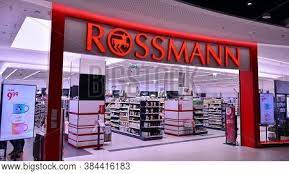


# **Data Description**

  ### **Rossmann Stores Data.csv** - historical data including Sales
  ### **store.csv** - supplemental information about the stores

  ## **Data fields**
  ### Most of the fields are self-explanatory. The following are descriptions for those that aren't.


  *   **Id** - an Id that represents a (Store, Date) duple within the test set
  *   **Store** - a unique Id for each store


  *   **Sales** - the turnover for any given day (this is what you are predicting)

  *   **Customers** - the number of customers on a given day

  *   **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
  *   **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None


  *   **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools


  *   **StoreType** - differentiates between 4 different store models: a, b, c, d

  *   **Assortment** - describes an assortment level: a = basic, b = extra, c = extended

  *   **CompetitionDistance** - distance in meters to the nearest competitor store

  *   **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
  *   **Promo** - indicates whether a store is running a promo on that day


  *   **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating


  *   **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

  *   **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from pandas import datetime as dt
import datetime
import missingno as msno


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats



# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Load Dataset
sales_data = pd.read_csv('/content/drive/MyDrive/Almabetter/regression capstone project/Rossmann Stores Data.csv')
store_data = pd.read_csv('/content/drive/MyDrive/Almabetter/regression capstone project/store.csv')

### Dataset First View

In [7]:
# Dataset First Look
sales_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

### Dataset Second View

In [8]:
store_data.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Merging Datasets

In [9]:
df = sales_data.merge(store_data,how='inner',left_on='Store',right_on='Store')  ## We did inner join on these 2 datasets on the Store column

In [10]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
df.shape

(1017209, 18)

There are 1017209 rows and 18 columns in our dataset

### Dataset Information

In [12]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [14]:
# Missing Values/Null Values Count
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: >

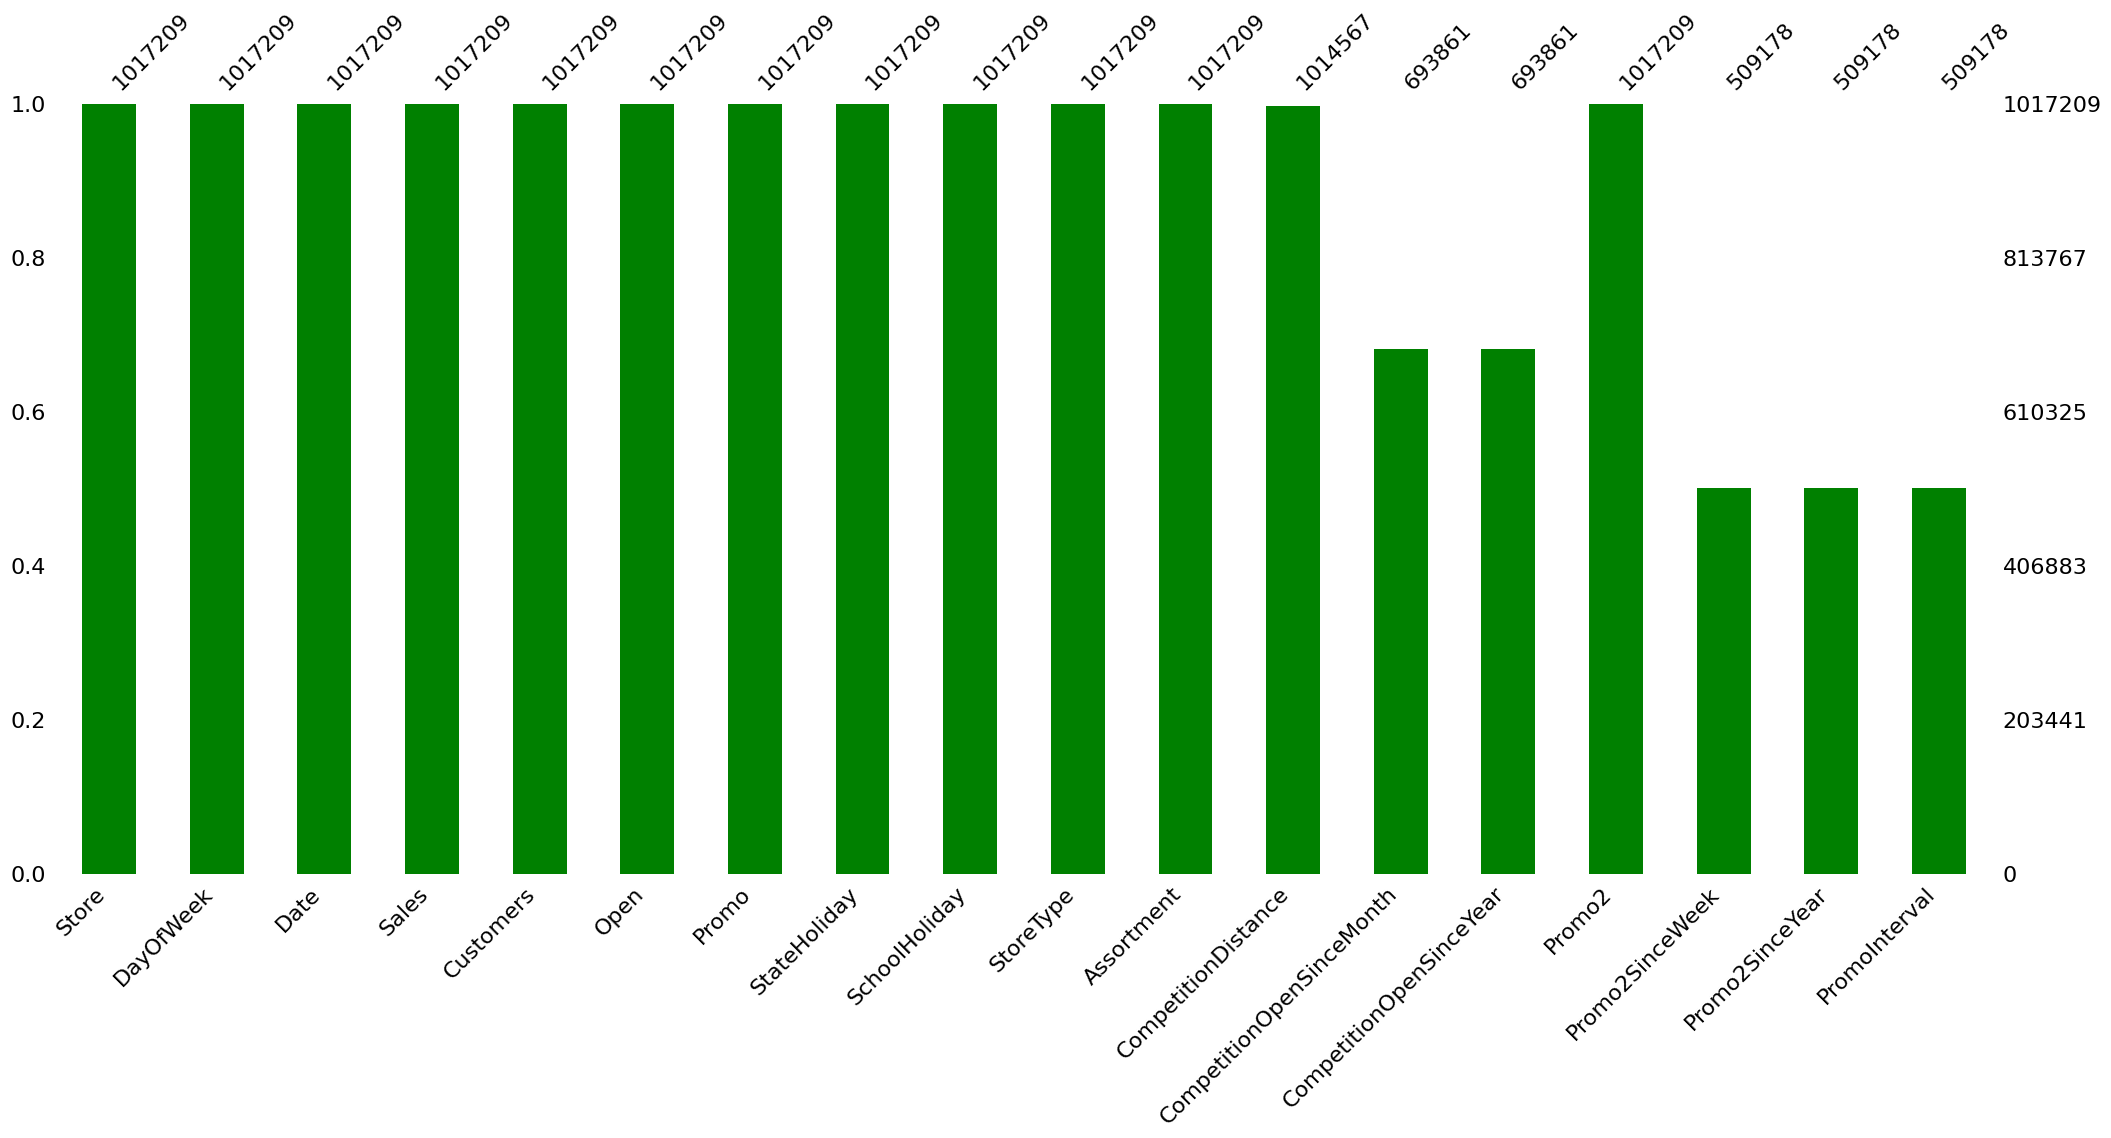

In [15]:
# Visualizing the missing values
msno.bar(df, color = 'green')

### What did you know about your dataset?

This dataset is a record form the RossMann Store recording their stores and week sales and other factors. The dependent variable or the target variable in the dataset is the Sales column

Our goal is to predict the sales in future with the given independent variables, as there are 18 features and 1017209 observations.

And till now we can see from above plot that Promo2SinceWeek, Promo2SinceYear,PromoInterval, CompetitionDistance, CompetitionOpenSinceMonth,CompetitionOpenSinceYear these columns have null values and must be treated, preferrably we can think of a way to handle these null values using mean, mode or median

## ***2. Understanding Variables***

In [16]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [17]:
# Dataset Describe
df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.330000e+03   
75%    1.000000e+00   0.000000e+00         6.890000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count              693861.000000             693861.000000  1.017209e+06   
mean                    7.222866               2008.690228  5.005638e-01   
std                     3.211832                  5.992644  4.999999e-01   
min                     1.000000               1900.000000  0.000000e+00   
25%                     4.000000               2006.000000  0.000000e+00   
50%                     8.000000               2010.000000  1.000000e+00   
75%                    10.000000               2013.000000  1.000000e+00   
max                    12.000000               2015.000000  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear  
count    509178.000000    509178.000000  
mean         23.269093      2011.752774  
std          14.095973         1.662870  
min           1.000000      2009.000000  
25%          13.000000      2011.000000  
50%          22.000000      2012.000000  
75%          37.000000      2013.000000  
max          50.000000      2015.000000

In [18]:
## Converting the Date Column Data Type To DateTime
df["Date"]=pd.to_datetime(df["Date"])

In [19]:
# Extracting Date,Year,Month,Day
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [20]:
# as we extracted year,month,day from date columns so here we dropping the date column
df=df.drop(['Date'],axis=1)

In [21]:
df.head(5)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  
0              NaN              NaN           NaN  2015      7   31  
1              NaN              NaN           NaN  2015      7   30  
2              NaN              NaN           NaN  2015      7   29  
3              NaN              NaN           NaN  2015      7   28  
4              NaN              NaN           NaN  2015      7   27

### Handling Null Values

In [22]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
dtype: int64

In [23]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [24]:
df['Promo2SinceWeek'].fillna(0, inplace = True)
df['Promo2SinceYear'].fillna(0, inplace = True)
df['PromoInterval'].fillna(0, inplace = True)

We may have to drop these last 3 columns, Promo2SinceWeek, Promo2SinceYear, PromoInterval because they have around 50% of null values, but these null values shows that stores are not actually participating in promo2 that's why there are null values, so we have to replace it with 0

In [25]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

<Axes: >

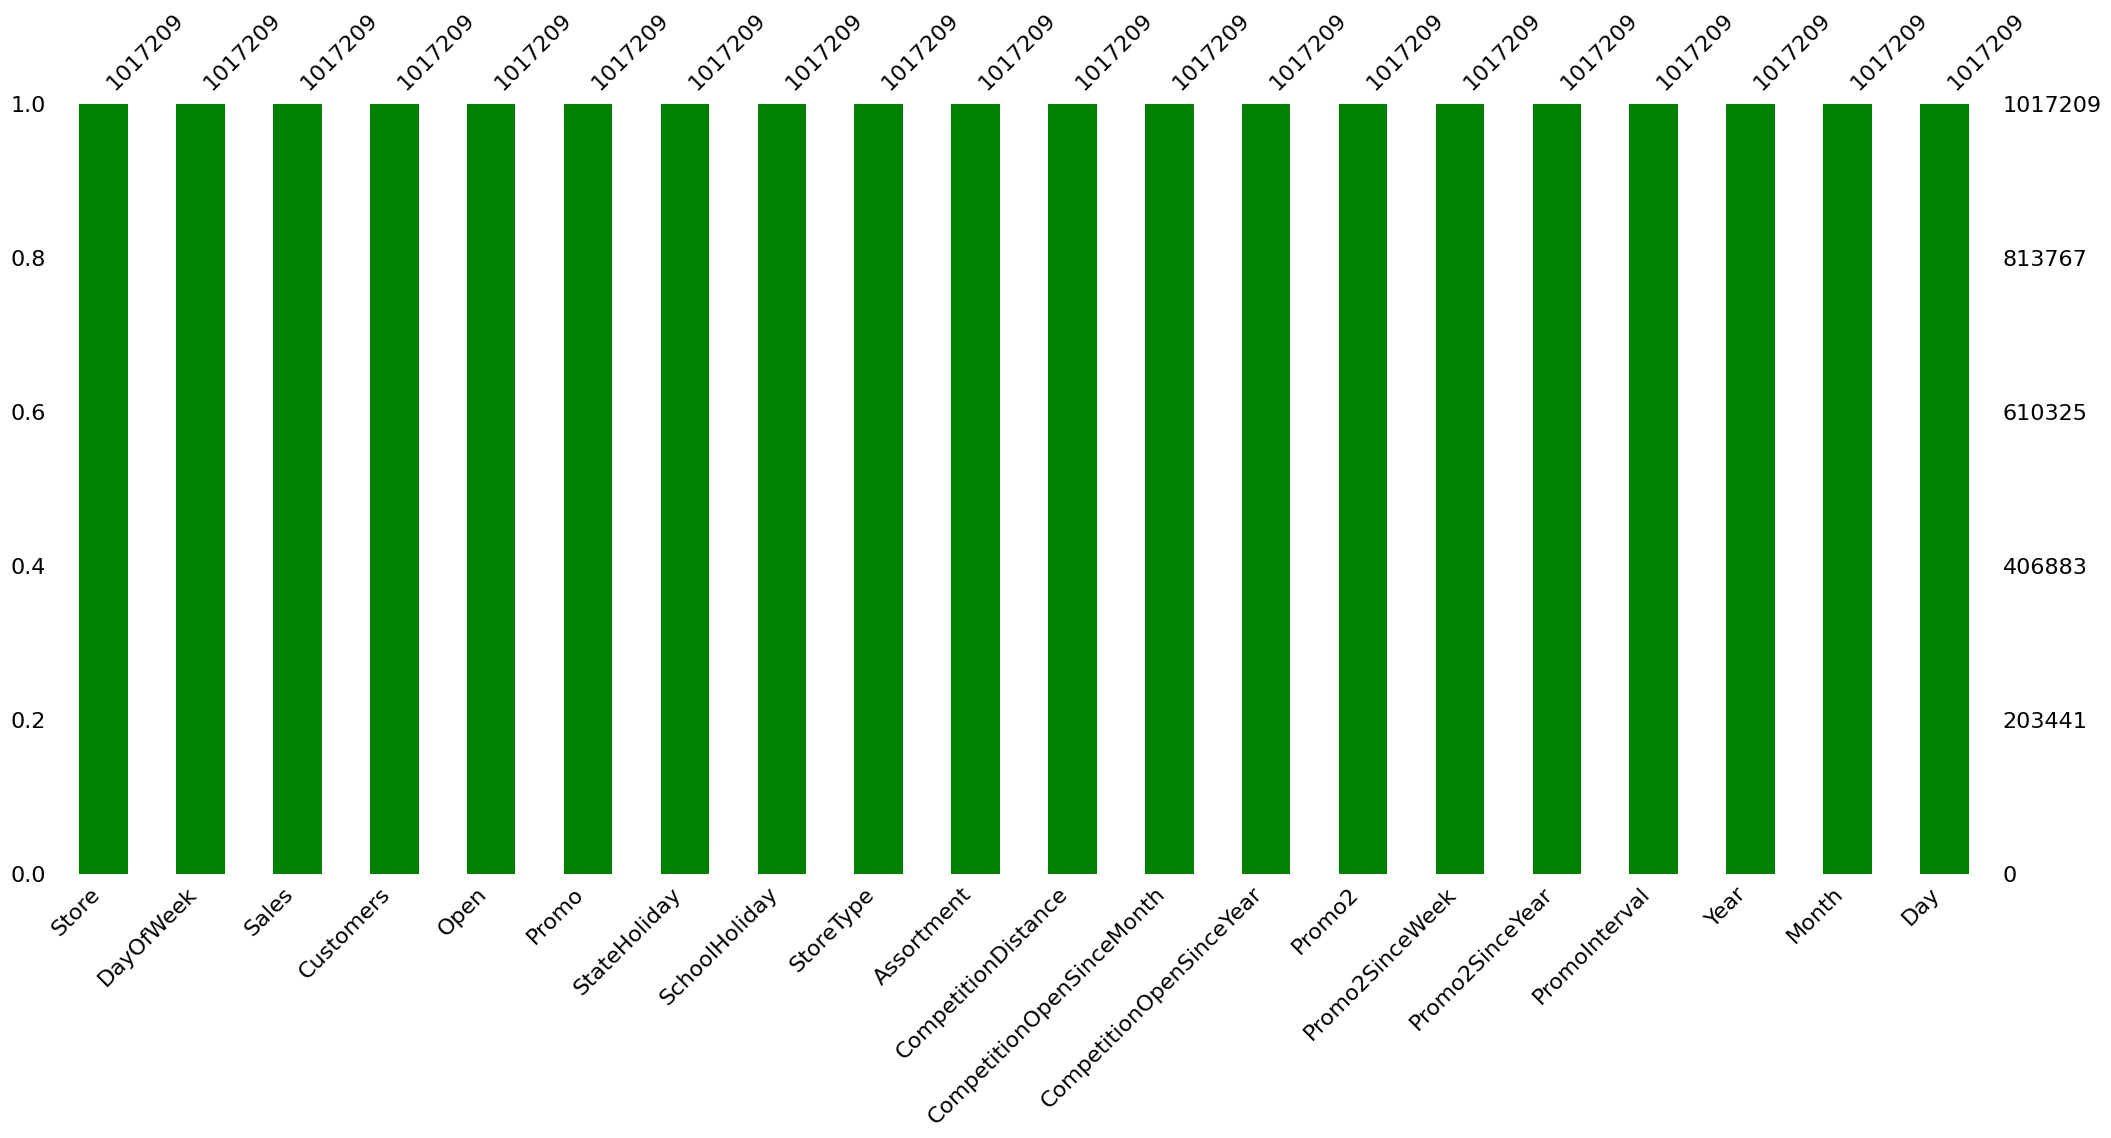

In [26]:
msno.bar(df, color = 'green')   #After handling missing values

In [27]:
df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  
0              0.0              0.0             0  2015      7   31  
1              0.0              0.0             0  2015      7   30  
2              0.0              0.0             0  2015      7   29  
3              0.0              0.0             0  2015      7   28  
4              0.0              0.0             0  2015      7   27

In [28]:
df.shape

(1017209, 20)

### Variables Description
We have handled all the null values in our dataset, and created new variables using date column.

There are 20 variables in our dataset till now, and we can see that there are few categorical variables, so we may look forward to apply one hot encoding in the future for these variables.

There are 16 Numerical columns and 4 categorical columns at present.

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.
variables_in_df = df.columns.to_list()

In [30]:
for i in variables_in_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of Store are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of DayOfWeek are: [5 4 3 2 1 7 6]
The Unique Values of Sales are: [ 5263  5020  4782 ... 20362 18841 21237]
The Unique Values of Customers are: [ 555  546  523 ... 3727 4022 4106]
The Unique Values of Open are: [1 0]
The Unique Values of Promo are: [1 0]
The Unique Values of StateHoliday are: ['0' 'a' 'b' 'c' 0]
The Unique Values of SchoolHoliday are: [1 0]
The Unique Values of StoreType are: ['c' 'a' 'd' 'b']
The Unique Values of Assortment are: ['a' 'c' 'b']
The Unique Values of CompetitionDistance are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+

## 3. ***Data Wrangling***

### Data Wrangling Code

In [31]:
# Write your code to make your dataset analysis ready.
df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  
0              0.0              0.0             0  2015      7   31  
1              0.0              0.0             0  2015      7   30  
2              0.0              0.0             0  2015      7   29  
3              0.0              0.0             0  2015      7   28  
4              0.0              0.0             0  2015      7   27

In [32]:
df[df['Promo2'] != 0]

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
942          2          5   6064        625     1      1            0   
943          2          4   5567        601     1      1            0   
944          2          3   6402        727     1      1            0   
945          2          2   5671        646     1      1            0   
946          2          1   6627        638     1      1            0   
...        ...        ...    ...        ...   ...    ...          ...   
1017204   1115          6   4771        339     1      0            0   
1017205   1115          5   4540        326     1      0            0   
1017206   1115          4   4297        300     1      0            0   
1017207   1115          3   3697        305     1      0            0   
1017208   1115          2      0          0     0      0            a   

         SchoolHoliday StoreType Assortment  CompetitionDistance  \
942                  1         a          a                570.0   
943                  1         a          a                570.0   
944                  1         a          a                570.0   
945                  1         a          a                570.0   
946                  1         a          a                570.0   
...                ...       ...        ...                  ...   
1017204              1         d          c               5350.0   
1017205              1         d          c               5350.0   
1017206              1         d          c               5350.0   
1017207              1         d          c               5350.0   
1017208              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
942                           11.0                    2007.0       1   
943                           11.0                    2007.0       1   
944                           11.0                    2007.0       1   
945                           11.0                    2007.0       1   
946                           11.0                    2007.0       1   
...                            ...                       ...     ...   
1017204                        9.0                    2013.0       1   
1017205                        9.0                    2013.0       1   
1017206                        9.0                    2013.0       1   
1017207                        9.0                    2013.0       1   
1017208                        9.0                    2013.0       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  
942                 13.0           2010.0   Jan,Apr,Jul,Oct  2015      7   31  
943                 13.0           2010.0   Jan,Apr,Jul,Oct  2015      7   30  
944                 13.0           2010.0   Jan,Apr,Jul,Oct  2015      7   29  
945                 13.0           2010.0   Jan,Apr,Jul,Oct  2015      7   28  
946                 13.0           2010.0   Jan,Apr,Jul,Oct  2015      7   27  
...                  ...              ...               ...   ...    ...  ...  
1017204             22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    5  
1017205             22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    4  
1017206             22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    3  
1017207             22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    2  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    1  

[509178 rows x 20 columns]

In [33]:
# creating new columns from existing coulmns
df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

### Here we have created new column called "PromoOpen" from existing columns to measure more accurate period(in Months) from when the store was participating in the Promo2.

In [34]:
df[['Promo','Promo2','PromoInterval','Promo2SinceYear', 'Promo2SinceWeek', 'PromoOpen']].sample(10)

Promo  Promo2     PromoInterval  Promo2SinceYear  Promo2SinceWeek  \
975096       0       1   Jan,Apr,Jul,Oct           2011.0             14.0   
533960       1       0                 0              0.0              0.0   
679032       0       1  Mar,Jun,Sept,Dec           2011.0             35.0   
778107       1       1   Jan,Apr,Jul,Oct           2010.0             13.0   
242234       0       0                 0              0.0              0.0   
73310        0       1   Jan,Apr,Jul,Oct           2014.0             40.0   
298005       1       0                 0              0.0              0.0   
1011791      0       0                 0              0.0              0.0   
961273       0       1   Feb,May,Aug,Nov           2013.0             45.0   
237715       1       0                 0              0.0              0.0   

         PromoOpen  
975096       23.50  
533960    24181.00  
679032       26.25  
778107       46.75  
242234    24177.00  
73310         4.00  
298005    24172.00  
1011791   24180.00  
961273       -0.25  
237715    24177.00

In [35]:
df.iloc[240267] ##This shows large number of promoopen shows us that this store has never opted for second promotion that's why number of months are so high,
## Same Concepts applied for all the stores with big promoOpen values
##df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

Store                                    265
DayOfWeek                                  2
Sales                                   8928
Customers                                706
Open                                       1
Promo                                      1
StateHoliday                               0
SchoolHoliday                              0
StoreType                                  a
Assortment                                 a
CompetitionDistance                   4580.0
CompetitionOpenSinceMonth                9.0
CompetitionOpenSinceYear              2013.0
Promo2                                     1
Promo2SinceWeek                         14.0
Promo2SinceYear                       2015.0
PromoInterval                Jan,Apr,Jul,Oct
Year                                    2014
Month                                     12
Day                                       16
PromoOpen                               -3.5
Name: 240267, dtype: object

In [36]:
df.iloc[1]
#(12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

Store                              1
DayOfWeek                          4
Sales                           5020
Customers                        546
Open                               1
Promo                              1
StateHoliday                       0
SchoolHoliday                      1
StoreType                          c
Assortment                         a
CompetitionDistance           1270.0
CompetitionOpenSinceMonth        9.0
CompetitionOpenSinceYear      2008.0
Promo2                             0
Promo2SinceWeek                  0.0
Promo2SinceYear                  0.0
PromoInterval                      0
Year                            2015
Month                              7
Day                               30
PromoOpen                    24187.0
Name: 1, dtype: object

In [37]:
df['PromoOpen'].head()

0    24187.0
1    24187.0
2    24187.0
3    24187.0
4    24187.0
Name: PromoOpen, dtype: float64

In [38]:
# Checking PromoOpen Negative figures
df[df["PromoOpen"]<0].head(10)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
17926     20          1   9229        954     1      1            0   
17927     20          7      0          0     0      0            0   
17928     20          6   5572        566     1      0            0   
17929     20          5   7149        839     1      0            0   
17930     20          4   8118        997     1      0            0   
17931     20          3   7212        911     1      0            0   
17932     20          2   7104        854     1      0            0   
17933     20          1   7856        946     1      0            0   
17934     20          7      0          0     0      0            0   
17935     20          6   4862        499     1      0            0   

       SchoolHoliday StoreType Assortment  ...  CompetitionOpenSinceMonth  \
17926              0         d          a  ...                        5.0   
17927              0         d          a  ...                        5.0   
17928              0         d          a  ...                        5.0   
17929              0         d          a  ...                        5.0   
17930              0         d          a  ...                        5.0   
17931              0         d          a  ...                        5.0   
17932              0         d          a  ...                        5.0   
17933              0         d          a  ...                        5.0   
17934              0         d          a  ...                        5.0   
17935              0         d          a  ...                        5.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
17926                    2009.0       1             40.0           2014.0   
17927                    2009.0       1             40.0           2014.0   
17928                    2009.0       1             40.0           2014.0   
17929                    2009.0       1             40.0           2014.0   
17930                    2009.0       1             40.0           2014.0   
17931                    2009.0       1             40.0           2014.0   
17932                    2009.0       1             40.0           2014.0   
17933                    2009.0       1             40.0           2014.0   
17934                    2009.0       1             40.0           2014.0   
17935                    2009.0       1             40.0           2014.0   

         PromoInterval  Year  Month  Day  PromoOpen  
17926  Jan,Apr,Jul,Oct  2014      6   30       -4.0  
17927  Jan,Apr,Jul,Oct  2014      6   29       -4.0  
17928  Jan,Apr,Jul,Oct  2014      6   28       -4.0  
17929  Jan,Apr,Jul,Oct  2014      6   27       -4.0  
17930  Jan,Apr,Jul,Oct  2014      6   26       -4.0  
17931  Jan,Apr,Jul,Oct  2014      6   25       -4.0  
17932  Jan,Apr,Jul,Oct  2014      6   24       -4.0  
17933  Jan,Apr,Jul,Oct  2014      6   23       -4.0  
17934  Jan,Apr,Jul,Oct  2014      6   22       -4.0  
17935  Jan,Apr,Jul,Oct  2014      6   21       -4.0  

[10 rows x 21 columns]

In [39]:
df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  ...  CompetitionOpenSinceMonth  \
0              1         c          a  ...                        9.0   
1              1         c          a  ...                        9.0   
2              1         c          a  ...                        9.0   
3              1         c          a  ...                        9.0   
4              1         c          a  ...                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2008.0       0              0.0              0.0   
2                    2008.0       0              0.0              0.0   
3                    2008.0       0              0.0              0.0   
4                    2008.0       0              0.0              0.0   

   PromoInterval  Year  Month  Day  PromoOpen  
0              0  2015      7   31    24187.0  
1              0  2015      7   30    24187.0  
2              0  2015      7   29    24187.0  
3              0  2015      7   28    24187.0  
4              0  2015      7   27    24187.0  

[5 rows x 21 columns]

### These negative values arise because these stores have not started promo yet

In [40]:
# Replacing Those Negative Figures With Zero
df.loc[df["PromoOpen"]<0, "PromoOpen" ] = 0

In [41]:
# Creating New Column From Existing Columns
df["CompetitionOpen"] = (12* (df["Year"]-df["CompetitionOpenSinceYear"])) + (df["Month"]-df["CompetitionOpenSinceMonth"])

Here we have created new column called "CompetitionOpen" from existing columns to measure the period(in months) from whem the nearest competition has opened

In [42]:
#Lets Check Our Columns
df[['CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

CompetitionDistance  CompetitionOpenSinceYear  \
373261                840.0                    2013.0   
938107               1590.0                    2006.0   
376983               6210.0                    2013.0   
308587               2280.0                    2013.0   
311092              15770.0                    2013.0   
676098               6710.0                    2003.0   
262076               6540.0                    2007.0   
132897               8540.0                    2013.0   
221390                710.0                    2012.0   
676763               1370.0                    2011.0   

        CompetitionOpenSinceMonth  CompetitionOpen  
373261                        9.0             -1.0  
938107                        3.0             97.0  
376983                        9.0             20.0  
308587                        9.0              0.0  
311092                        9.0              5.0  
676098                       11.0            130.0  
262076                       12.0             68.0  
132897                        9.0             12.0  
221390                        3.0             15.0  
676763                       12.0             42.0

In [43]:
# Checking CompetitionOpen Negative figures
df[df["CompetitionOpen"]<0].head(10)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
3890      5          2   7692        659     1      1            0   
3891      5          1   8847        770     1      1            0   
3892      5          7      0          0     0      0            0   
3893      5          6   2038        219     1      0            0   
3894      5          5   4181        499     1      0            0   
3895      5          4   3711        460     1      0            0   
3896      5          3   4325        613     1      0            0   
3897      5          2   4073        537     1      0            0   
3898      5          1   4028        540     1      0            0   
3899      5          7      0          0     0      0            0   

      SchoolHoliday StoreType Assortment  ...  CompetitionOpenSinceYear  \
3890              0         a          a  ...                    2015.0   
3891              0         a          a  ...                    2015.0   
3892              0         a          a  ...                    2015.0   
3893              0         a          a  ...                    2015.0   
3894              0         a          a  ...                    2015.0   
3895              0         a          a  ...                    2015.0   
3896              0         a          a  ...                    2015.0   
3897              0         a          a  ...                    2015.0   
3898              0         a          a  ...                    2015.0   
3899              0         a          a  ...                    2015.0   

      Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  Year Month  \
3890       0              0.0              0.0              0  2015     3   
3891       0              0.0              0.0              0  2015     3   
3892       0              0.0              0.0              0  2015     3   
3893       0              0.0              0.0              0  2015     3   
3894       0              0.0              0.0              0  2015     3   
3895       0              0.0              0.0              0  2015     3   
3896       0              0.0              0.0              0  2015     3   
3897       0              0.0              0.0              0  2015     3   
3898       0              0.0              0.0              0  2015     3   
3899       0              0.0              0.0              0  2015     3   

      Day  PromoOpen  CompetitionOpen  
3890   31    24183.0             -1.0  
3891   30    24183.0             -1.0  
3892   29    24183.0             -1.0  
3893   28    24183.0             -1.0  
3894   27    24183.0             -1.0  
3895   26    24183.0             -1.0  
3896   25    24183.0             -1.0  
3897   24    24183.0             -1.0  
3898   23    24183.0             -1.0  
3899   22    24183.0             -1.0  

[10 rows x 22 columns]

In [44]:
df['CompetitionOpen'].value_counts()

6.0       17418
4.0       17377
8.0       17348
7.0       17074
9.0       16853
          ...  
199.0        28
616.0        28
640.0        28
1369.0       28
628.0        28
Name: CompetitionOpen, Length: 367, dtype: int64

### Here CompetitionOpen column has figures in negative which indicates that the store do not have any competition. So we have replace those negative figures with zero

In [45]:
# now we can remove the CompetitionOpenSinceMonth	CompetitionOpenSinceYear	Promo2	Promo2SinceWeek	Promo2SinceYear

In [46]:
df.drop(['CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear',	'Promo2',	'Promo2SinceWeek'	,'Promo2SinceYear'], axis= 1, inplace = True)

In [47]:
df['PromoInterval']

0                         0
1                         0
2                         0
3                         0
4                         0
                 ...       
1017204    Mar,Jun,Sept,Dec
1017205    Mar,Jun,Sept,Dec
1017206    Mar,Jun,Sept,Dec
1017207    Mar,Jun,Sept,Dec
1017208    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1017209, dtype: object

In [48]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
PromoInterval          0
Year                   0
Month                  0
Day                    0
PromoOpen              0
CompetitionOpen        0
dtype: int64

### What all manipulations have you done and insights you found?

Here we have created some new columns using these columns-:
        
CompetitionOpenSinceMonth      
CompetitionOpenSinceYear    
Promo2                            
Promo2SinceWeek                  
Promo2SinceYear           

Using these columns we have created 2 new features named 'PromoOpen', to measure more accurate period(in Months) from when the store was participating in the Promo2. and 'CompetitionOpen' to measure the period(in months) from whem the nearest competition has opened.

And At last we dropped all these 6 columns

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

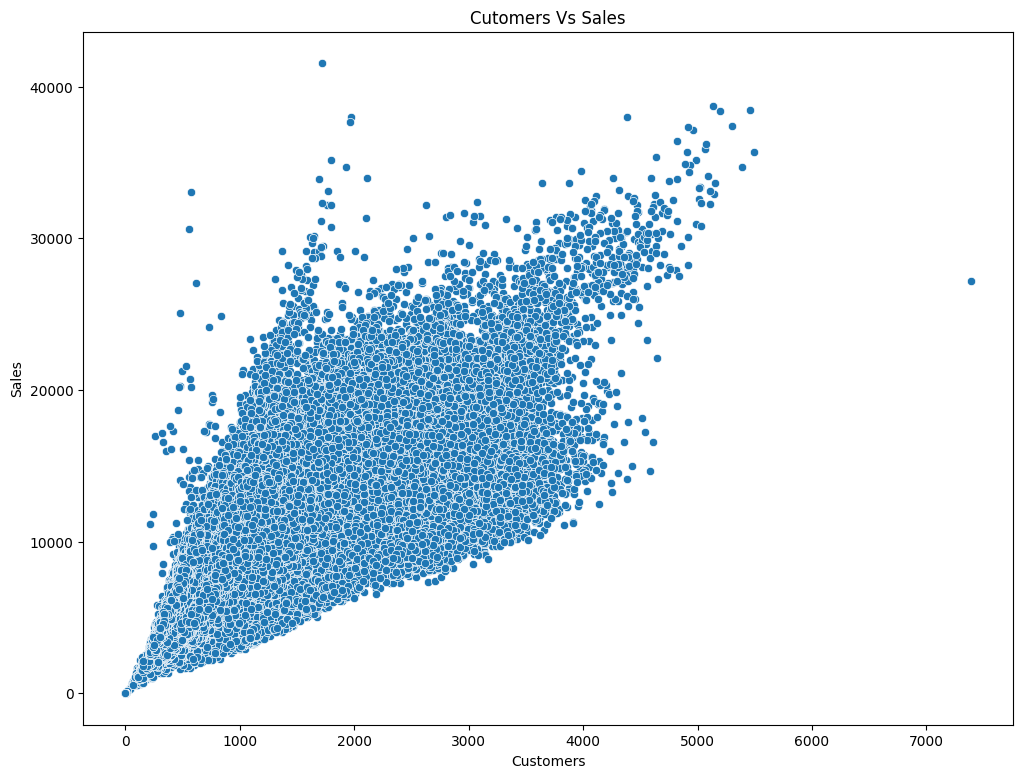

In [49]:
# Chart - 1 visualization code
plt.figure(figsize = (12,9))
sns.scatterplot(data=df,x="Customers",y="Sales")
plt.title("Cutomers Vs Sales")
plt.show()

##### 1. Why did you pick the specific chart?

We choose scatter plot because we wanted to plot the relationship between 2 numerical variables.
They are also useful for identifying outliers in the data, as well as to determine correlation between 2 variables, and linear trend in our dataset. Scatter plots help us to build and evaluate machine learning models.


##### 2. What is/are the insight(s) found from the chart?

We understood from the above trend that our data shows linear trend between these 2 variables - customers and sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the customer increases, the sales increases. They are directly proportional to each other and are highly correlated. It can help business to promote their strategies using marketing campaigns, ads to attract more customers which helps them to increase the sales.

#### Chart - 2

In [50]:
# Chart - 2 visualization code
sns.barplot(x=df['DayOfWeek'], y=df['Sales'])
plt.xticks(rotation=50)
plt.show()

##### 1. Why did you pick the specific chart?

We used this chart to plot the relation between day of the week and sales.

We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to a wide audience.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can see that the sales are high in the first 3 days, and varies after that, and on the 7th day of week we can see that there are no sales at all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If you're more concerned about your business then open the store at sunday's also, as it may help in increase the sales.

#### Chart - 3

In [53]:
df['Assortment']

0          a
1          a
2          a
3          a
4          a
          ..
1017204    c
1017205    c
1017206    c
1017207    c
1017208    c
Name: Assortment, Length: 1017209, dtype: object

ValueError: ignored

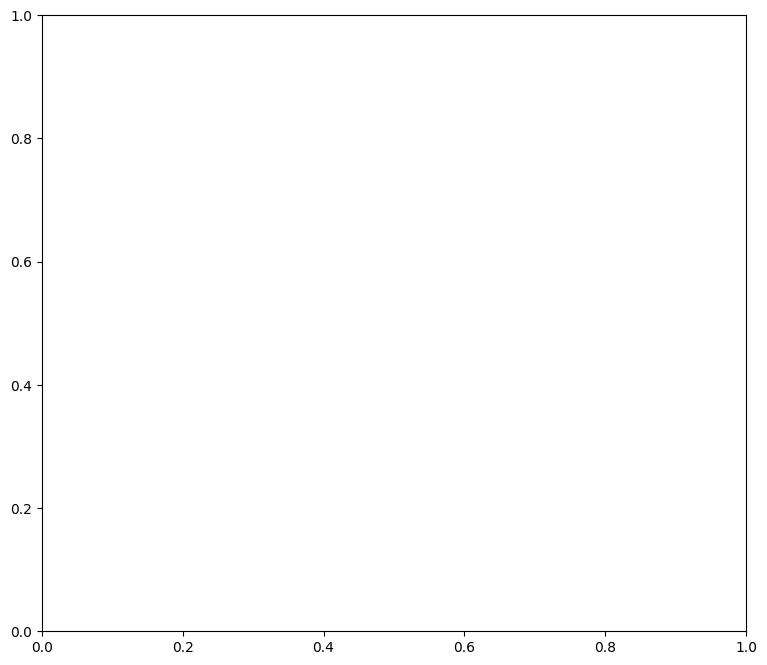

In [51]:
# Chart - 3 visualization code
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
ax=sns.countplot(df['Assortment'])
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_title("Assortments Count",fontsize=15,fontdict={"weight": "bold"}, color='Black')

#### Chart - 3

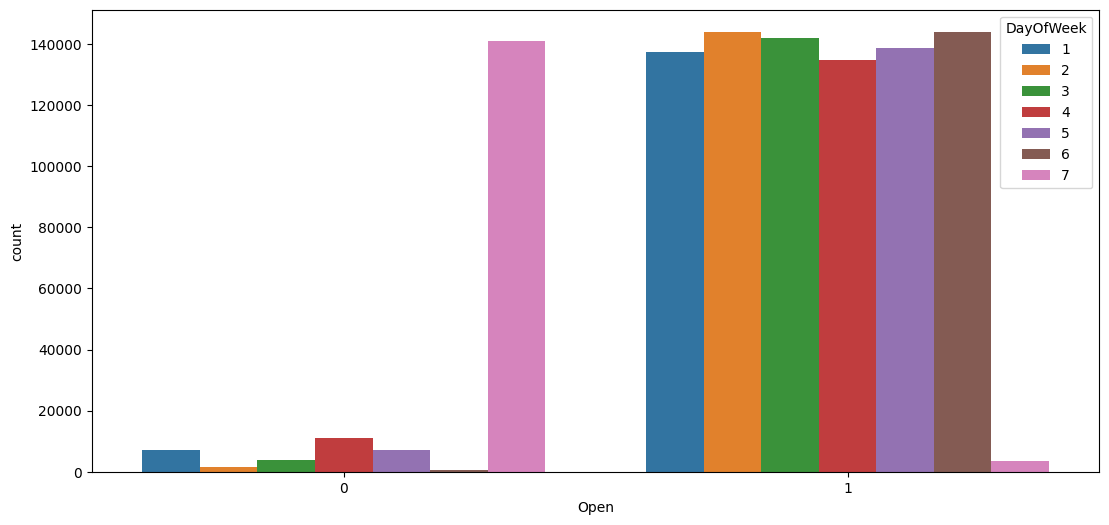

In [54]:
# Chart - 4 visualization code
#Checking whether schools are opened or not
plt.figure(figsize=(13,6))
sns.countplot(x='Open',hue='DayOfWeek', data=df)
plt.show()




##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

From the above inference we found that stores are opened during the week days, and closed on Sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can plan to open stores on Sunday, because there will be very less competition and they'll be able to make more profit from the sales.

#### Chart - 4

Text(0.5, 0, 'Date')

<Figure size 3500x1500 with 0 Axes>

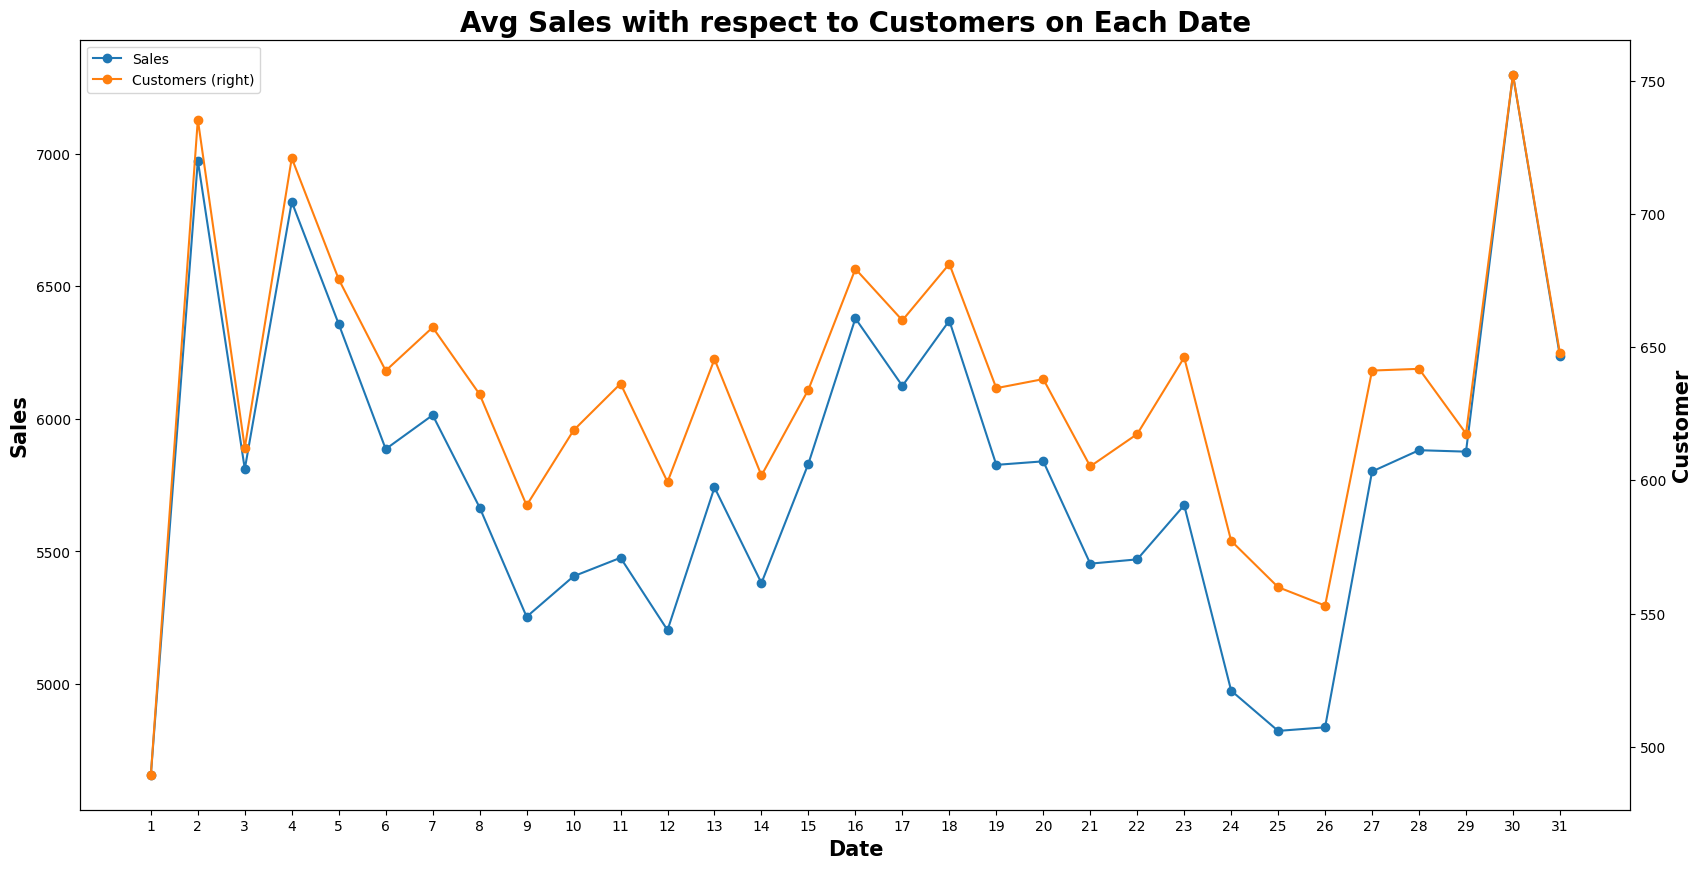

In [55]:
# Chart - 5 visualization code
plt.figure(figsize=(35,15))
ax = df.groupby('Day')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
ax.set_xticks(range(1,32))
plt.title('Avg Sales with respect to Customers on Each Date',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Date',size=15,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

This plot helped us in highlighting patterns and trends: By showing the relationship between two variables, line plots can help us identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Sales were at their peak in the starting days of months, and gradually decreased afterwards, and sales were very low between 24-26, after that sales were gradually increased due to season end promotional offers or maybe the festive season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If businesses plans to give offers in the middle of month, then it could help in increasing the sales

#### Chart - 5

<Axes: xlabel='Month', ylabel='Sales'>

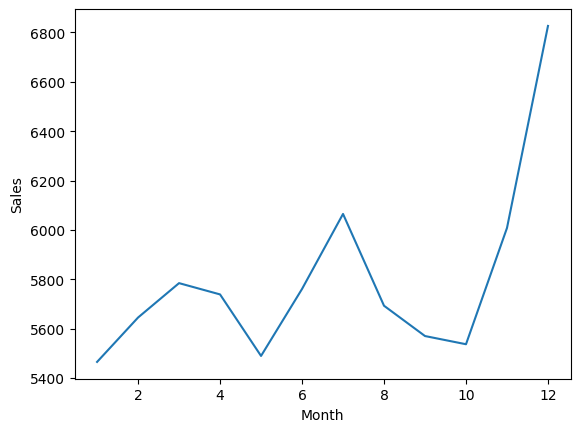

In [56]:
# Chart - 6 visualization code
sns.lineplot(x= df.groupby(df.Month).mean().index,
             y = df.groupby(df.Month).mean()['Sales'])

##### 1. Why did you pick the specific chart?

Here we used line plot to build time series graph because time series graphs are best represented by line plots.



##### 2. What is/are the insight(s) found from the chart?

We can see from the above plot that continously sales are increasing in the first 4 months. In May sales were very low, after that the sales again increased then again decreased. But we can see that Sales were highest in the last 2 months, because of black friday sales and christmas, and new year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In last 2 months, we saw that sales continously increased because of festive season, this insight can help business in creating good marketing strategies and provide attractive offers to their customers.


#### Chart - 6

Text(0.5, 0, 'Day Of Week')

<Figure size 3000x1500 with 0 Axes>

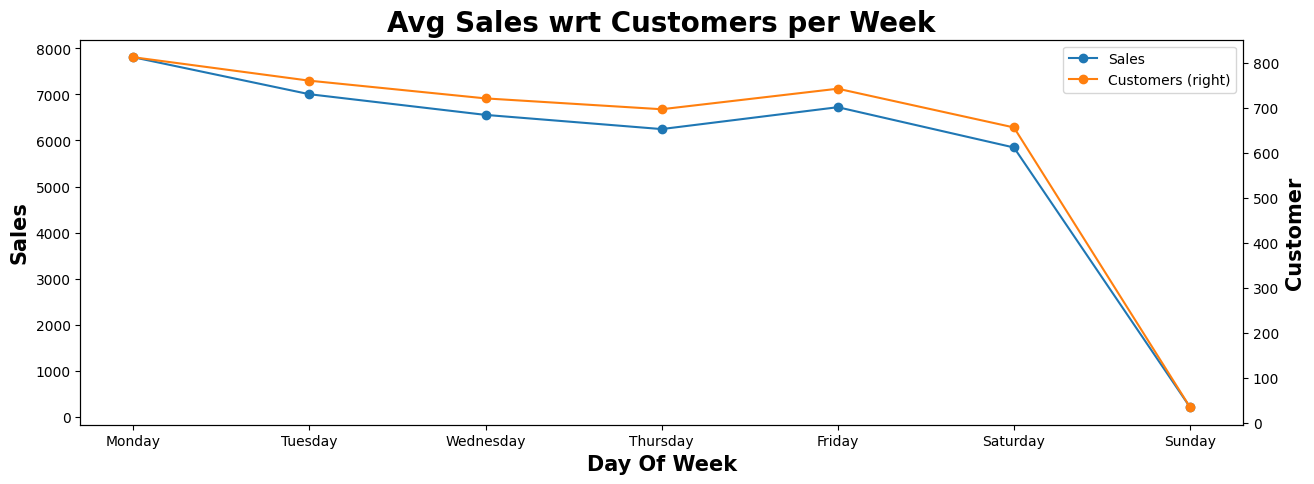

In [57]:
# Chart - 7 visualization code
plt.figure(figsize=(30,15))
ax = df.groupby('DayOfWeek')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.xticks(range(1,8),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Avg Sales wrt Customers per Week',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Day Of Week',size=15,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

This plot helped us in highlighting patterns and trends: By showing the relationship between two variables, line plots can help us identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Number of customers and sales are constantly decreasing here, and also we can see that on sunday sales and number of customers are very low.

#### Chart - 7

<Axes: xlabel='Month', ylabel='Sales'>

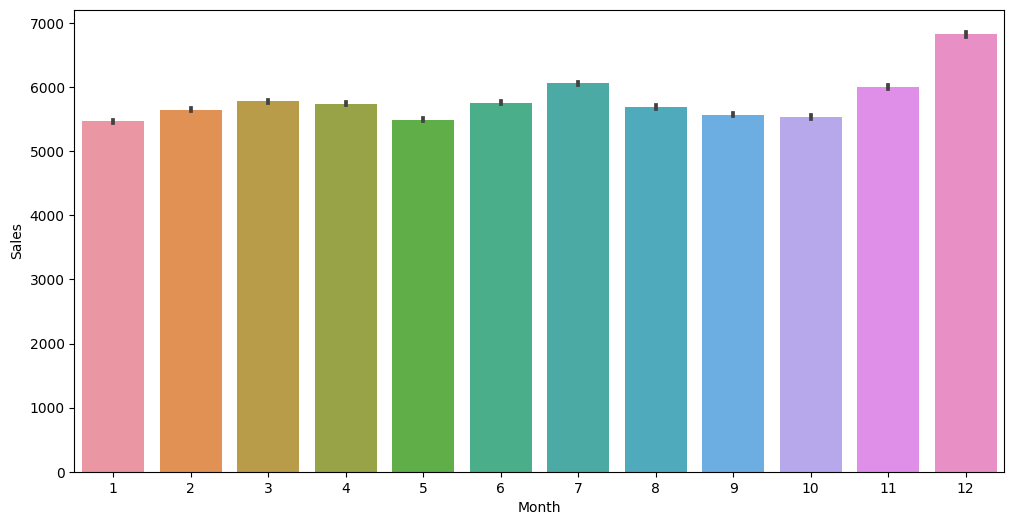

In [58]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Month',y='Sales')

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

Comparatively in the month of December, the sales are higher. But during most of the time in the year the sales are almost similar with very small variations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely, the insights are useful for the business as they now know that customers are more keen to purchase in December, so they can use special offers to attract more customers.
This shows that the Marginal propensity to consume of the customers are higher during month of December, so they can run more promos to attarct more customers.

#### Chart - 8

Text(0.5, 1.0, 'Sales During State Holidays')

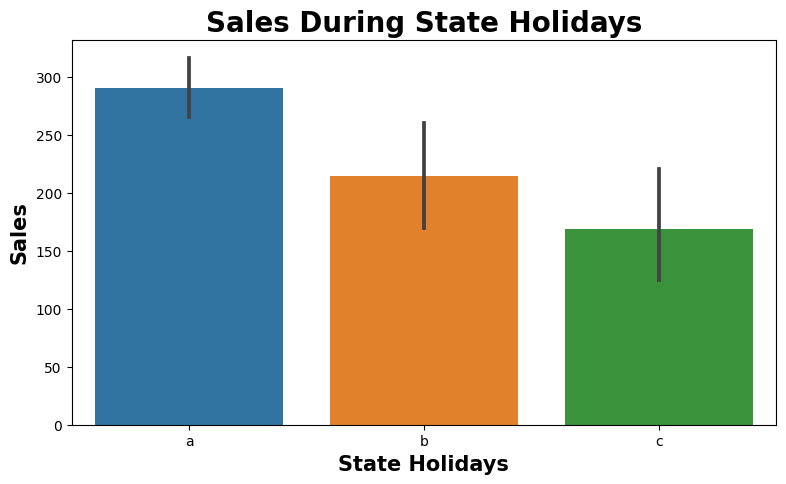

In [59]:
# Chart - 9 visualization code
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
ax = sns.barplot(data=df[(df.StateHoliday != 0) & (df.StateHoliday!= '0')],x='StateHoliday',y='Sales')
ax.set_xlabel('State Holidays',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Sales During State Holidays",fontsize=20,fontdict={"weight": "bold"})


##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

Sales are maximum during the Public Holidays, where are during the religious occassions, like Easter or Christmas, the sales are lower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business can create special offers or bundle products to increase the sales during the religious festivals, or they can decide to remain close during these festivals to reduce running cost or expenses.



#### Chart - 9

Text(0.5, 1.0, 'Sales impacted during School Holidays')

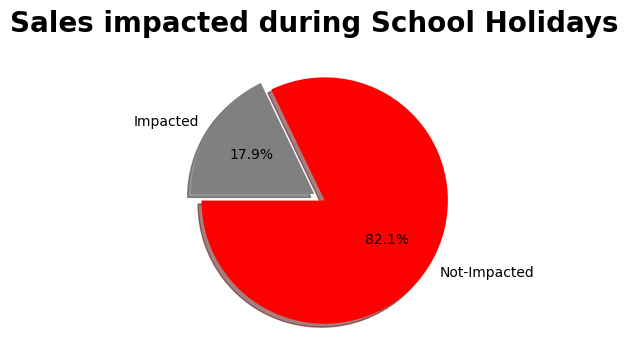

In [60]:
# Chart - 10 visualization code
plt.figure(figsize=(35,4))
plt.subplot(121)
labels = 'Not-Impacted' , 'Impacted'
sizes = df.SchoolHoliday.value_counts()
colors = ['Red', 'Grey']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Sales impacted during School Holidays",size=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

It is an attactive visual giving the ideas, what message is being transformed, just by one look on the graph. Also enables us to fractionally divide the same dataset into multiple parts.

##### 2. What is/are the insight(s) found from the chart?

As we can check the above pie chart, it shows that 17.9% of sales were impacted during the school holidays, which means we may guess that during holidays students might fly for vacations or it can be any extenuating circumstances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that during the school holidays the sales are impacted by 17.9% which can be reduced, if the business can provide better offers during school holidays.

#### Chart - 10

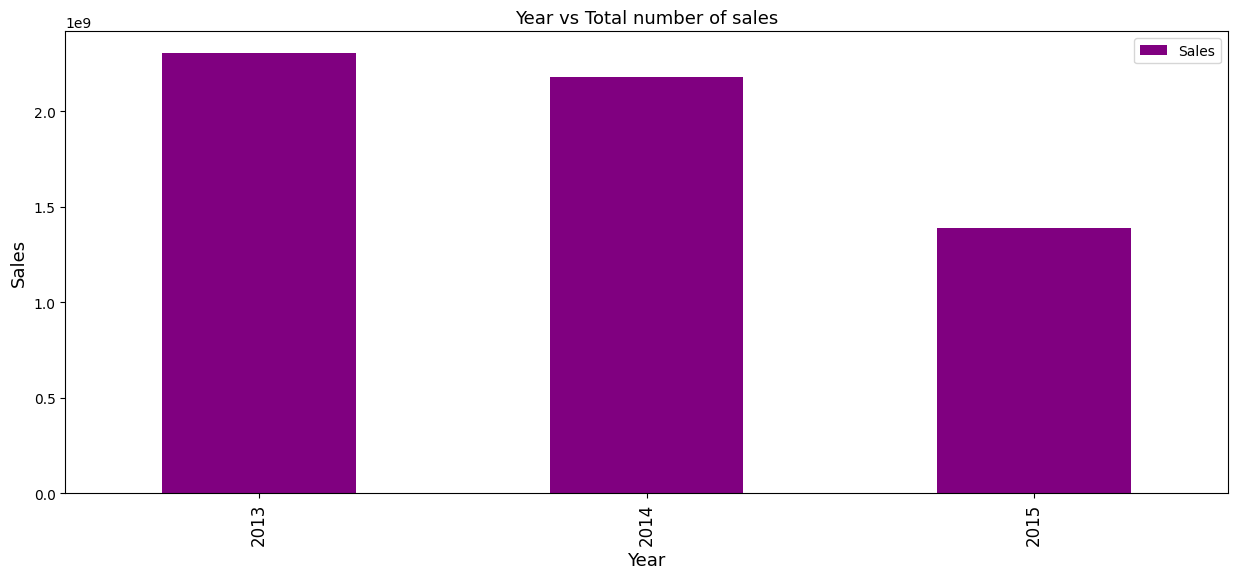

In [66]:
# Chart - 12 visualization code
year_vs_sales = df.groupby("Year")["Sales"].sum()
year_vs_sales.plot(kind='bar',color="purple",figsize=(15,6))
plt.title("Year vs Total number of sales",fontsize=13)
plt.xlabel("Year",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Sales",fontsize=13)
plt.legend()

In [67]:
df['Year'].value_counts()

2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

As we can take inference from the above plot that the Sales gradually dropped as there was more competition among stores during 2013,2014, and 2015.

This shows that the customers are loosing faith in the brand and the businnes need to give some serious thought to it.

Steps has to be taken on urgent basis as the businees can't afford to loose more sales or customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can definately help the business as it will alarm the business to take some better sales aspects, and plan some exceptionally exciting offers.

#### Chart - 11

In [68]:
# Chart - 13 visualization code
Store_type_vs_sells = df.groupby("StoreType")["Sales"].sum()
Store_type_vs_sells.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Store Type vs Total number of sales",fontsize=13)
plt.xlabel("Stores",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Sales",fontsize=13)
plt.legend()

In [69]:
no_of_customers_vs_sales = df.groupby("StoreType")["Customers"].sum()
no_of_customers_vs_sales.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Store Type vs Total number of Customers",fontsize=13)
plt.xlabel("Stores",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Customers",fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

A-Type stores are leading both in Sales and Customers category followed by D-type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This suggest that the business should try to  open more outlets of Type A & D.

Also as the B types might be giving losses to the business and for future the business can think of closing such outlets.

#### Chart - 12 - Correlation Heatmap

<Axes: >

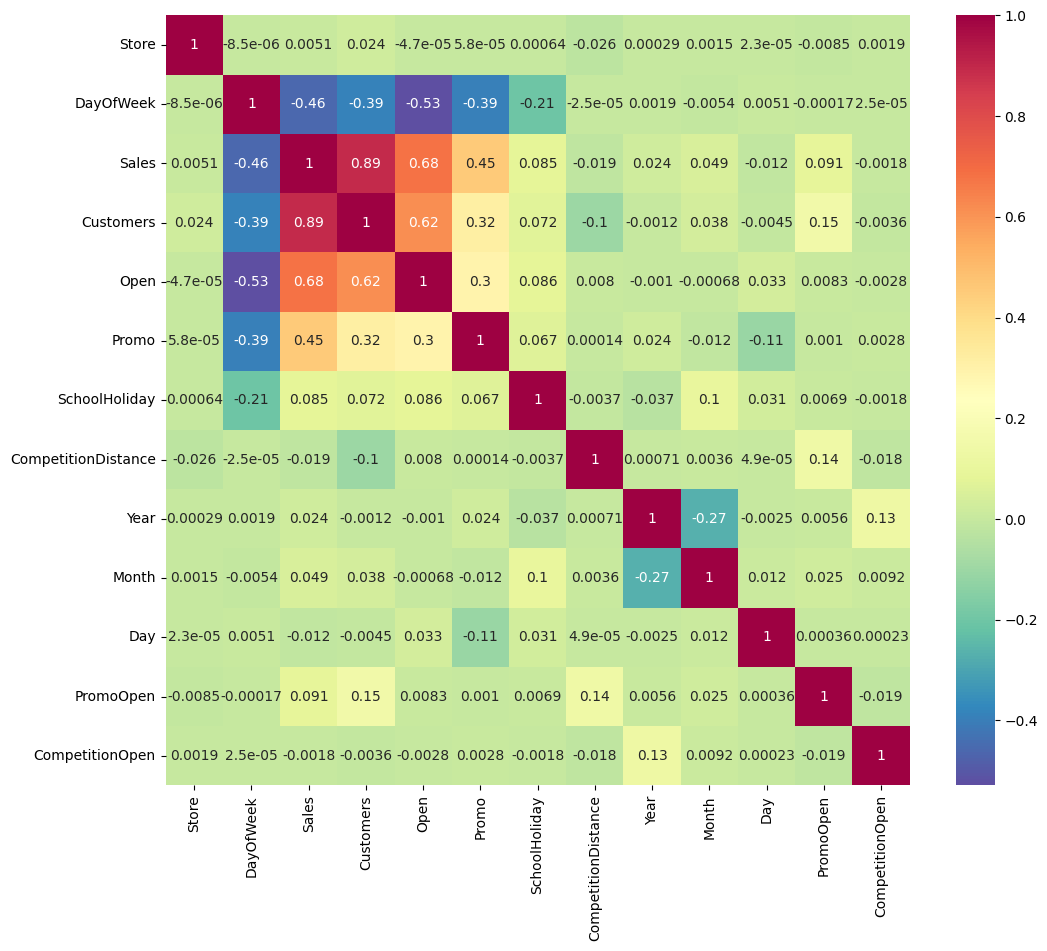

In [70]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot= True, cmap='Spectral_r')

##### 1. Why did you pick the specific chart?

It is one of its kind and no other graph can give the insights of correlation like heatmap does.

##### 2. What is/are the insight(s) found from the chart?

We checked the multicollinearity while implementing the linear regression.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps businesses to carefully analyze heatmap data and consider other factors, such as number of customers and market trends, before making significant changes to their business.

#### Chart - 13 - Pair Plot

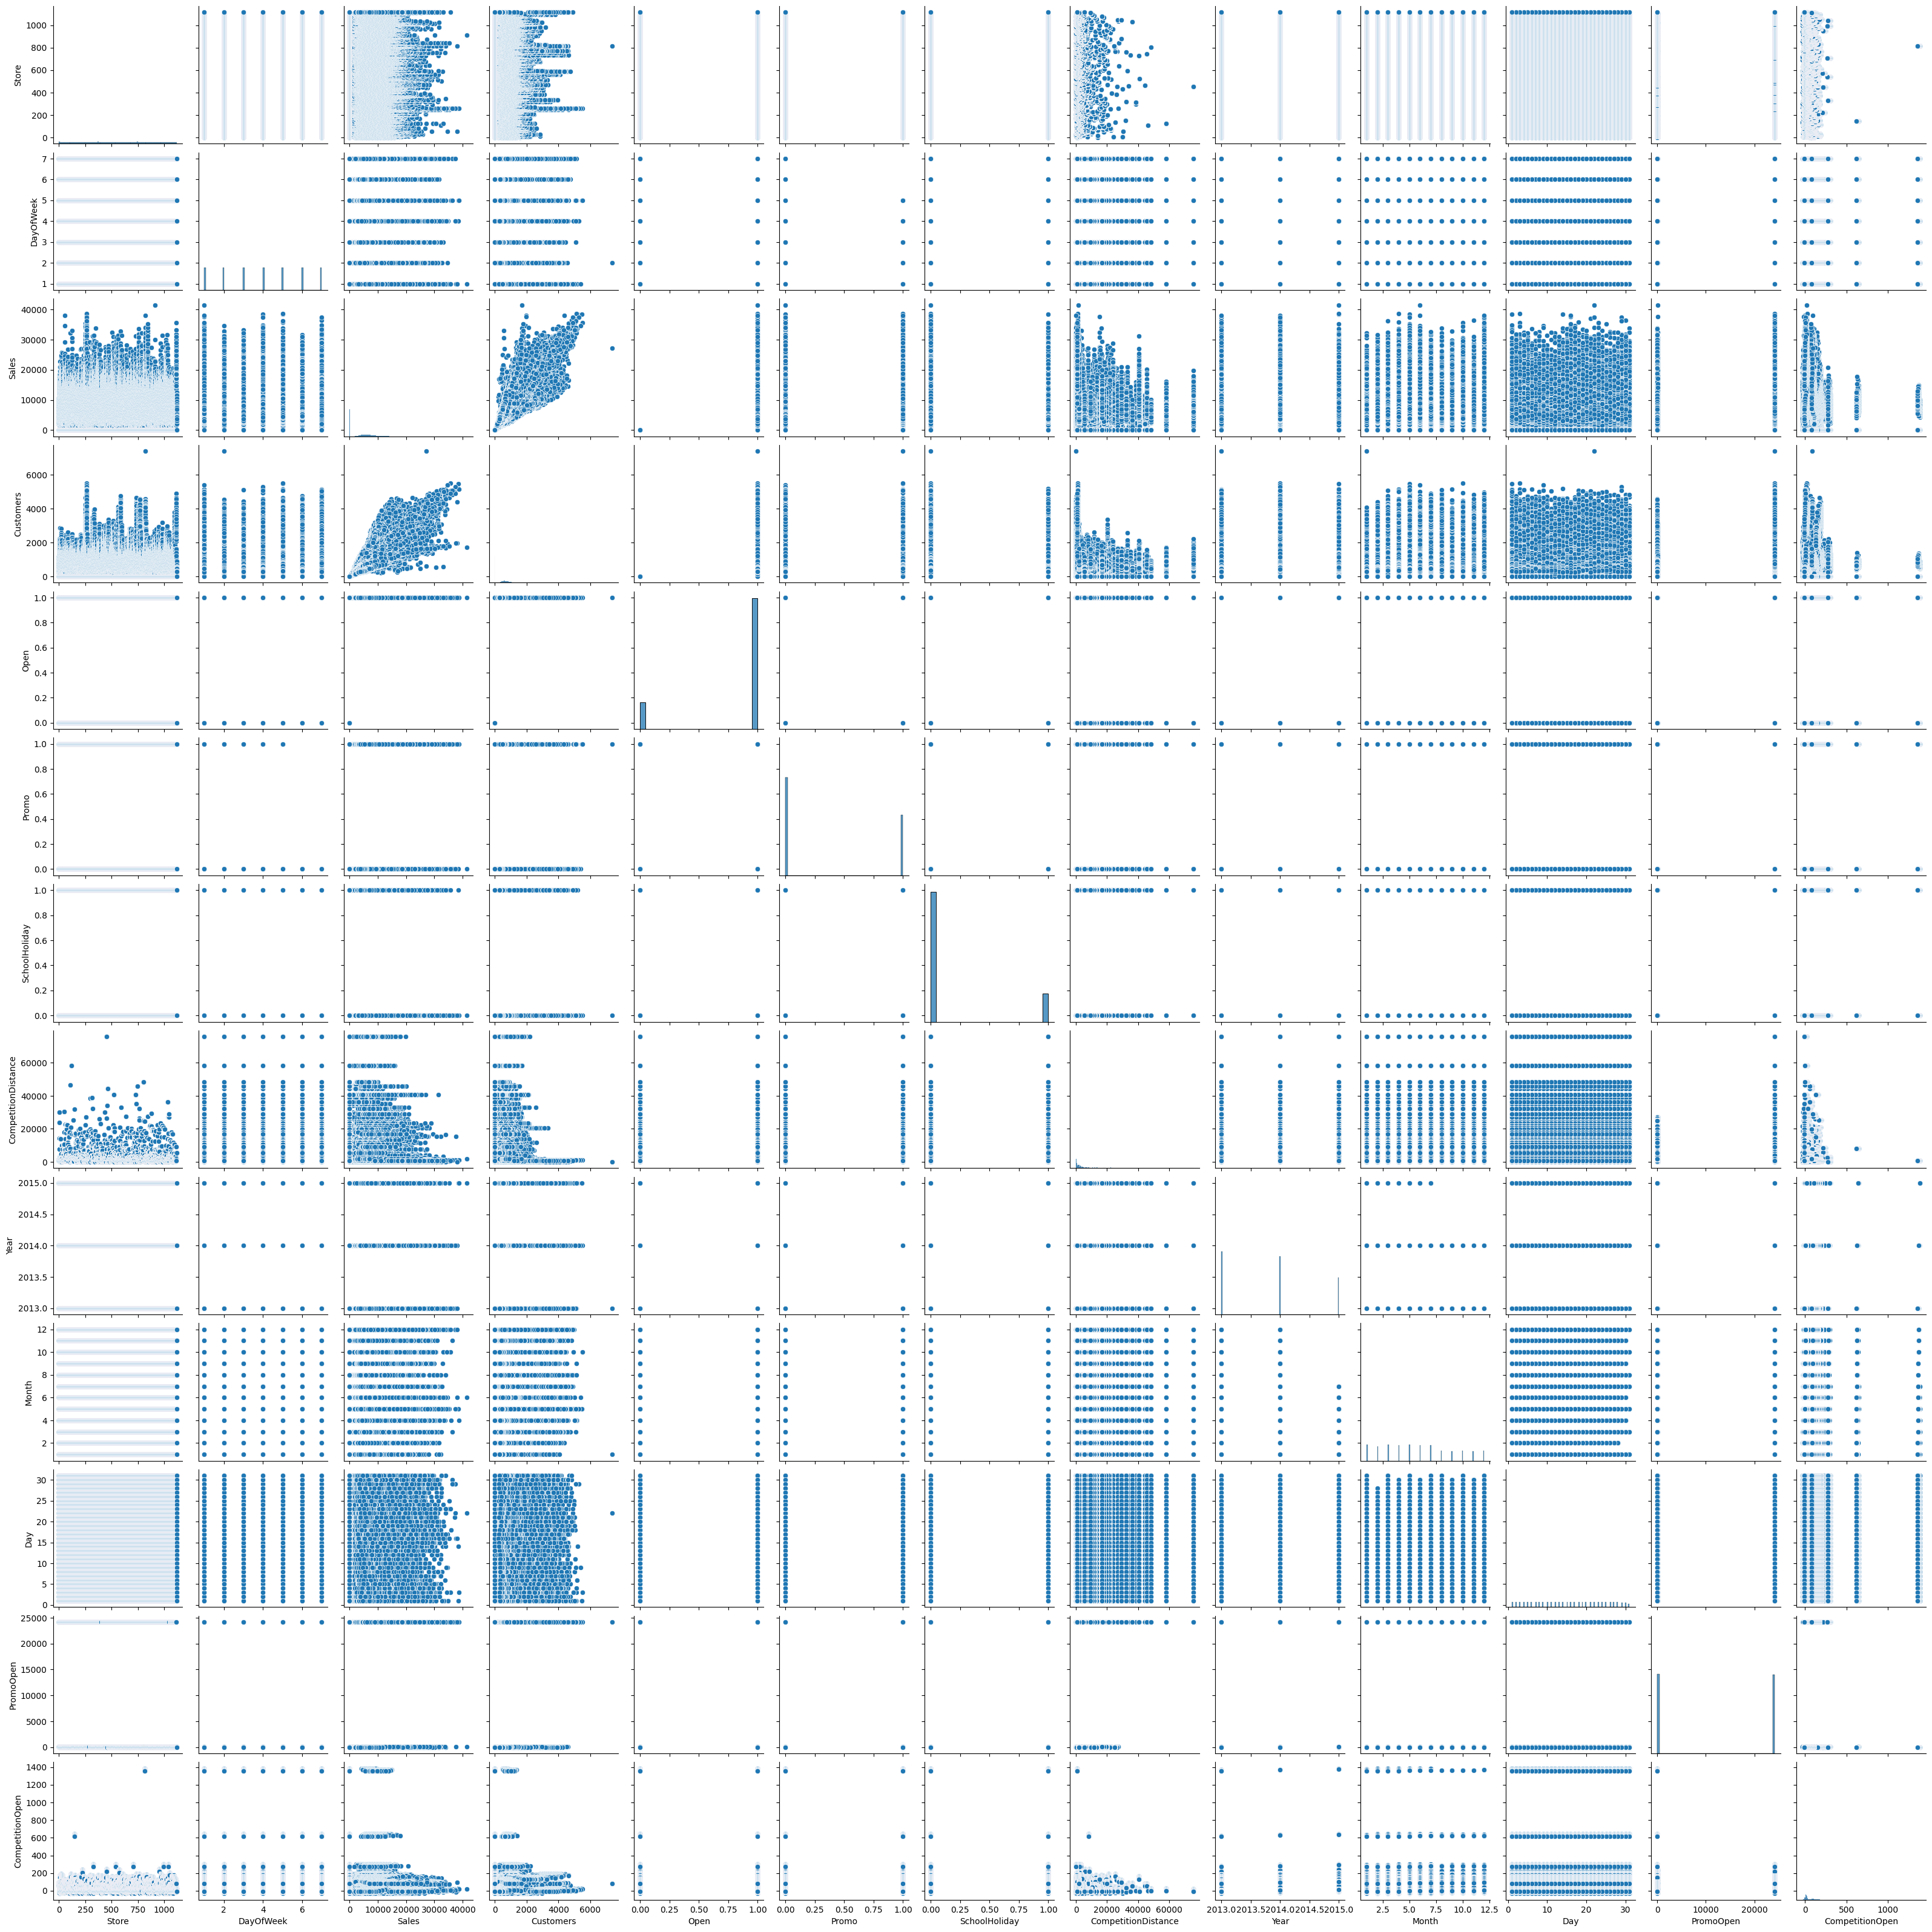

In [71]:
# # Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

It can give multiple visual aids in a single frame and various insights related to the data can be gained in one single look.

##### 2. What is/are the insight(s) found from the chart?

Pairplot helped us to visualize the relationship between sales and other variables, such as customers, Promotions, competition, and school holidays Columns. This helped us to identify which variables might be useful for predicting sales and inform the design for our machine learning model.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1-
Null Hypothesis - There is no relation between PromoOpen and Sales

Alternate Hypothesis - There is a relationship between promoOpen and sales

2- Null Hypothesis - There is no relation between Customers and Sales

 Alternate Hypothesis - There is a relationship between Customers and sales

3- Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis - There is no relation between PromoOpen and Sales
- Alternate Hypothesis - There is a relationship between promoOpen and sales

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["PromoOpen"].head(60)
second_sample = df["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.5f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.092, p = 0.48210
Accept Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation


##### Why did you choose the specific statistical test?

To find the relationship between the testing series

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis - There is no relation between Customers and Sales
- Alternate Hypothesis - There is a relationship between Customers and sales

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Customers"].head(60)
second_sample = df["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.983, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation

##### Why did you choose the specific statistical test?

To find the relationship between the testing series

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis - There is no relation between CompetitionOpen and Sales
- Alternate Hypothesis - There is a relationship between CompetitionOpen and sales

#### 2. Perform an appropriate statistical test.

In [74]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr
first_sample = df["CompetitionOpen"].head(60)
second_sample = df["Sales"].head(60)

stat, p = spearmanr(first_sample, second_sample)
print('stat=%.3f, p = %.5f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.123, p = 0.34731
Accept Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Spearman Correlation

##### Why did you choose the specific statistical test?

To define the rank of the the data, and find the correlation

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [75]:
# Handling Missing Values & Missing Value Imputation
## We have already handled missing values previously
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
PromoInterval          0
Year                   0
Month                  0
Day                    0
PromoOpen              0
CompetitionOpen        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

To treat the missing values we have replaced those values using median and mode.

### 2. Handling Outliers

<Axes: >

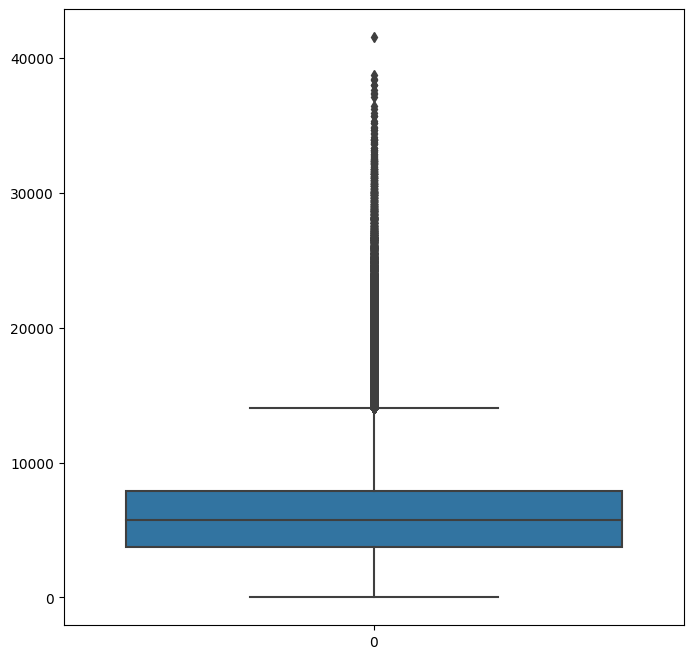

In [76]:
# Handling Outliers & Outlier treatments
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['Sales'])


In [77]:
 Q1 = np.percentile(df['Sales'],25)
 Q2 = np.percentile(df['Sales'],50)
 Q3 = np.percentile(df['Sales'],75)
 IQR =  Q3 - Q1
 a=Q1-(1.5*IQR)
 b=Q3+(1.5*IQR)
 df=df[(df['Sales']<b) & (df['Sales']>a)]

<Axes: >

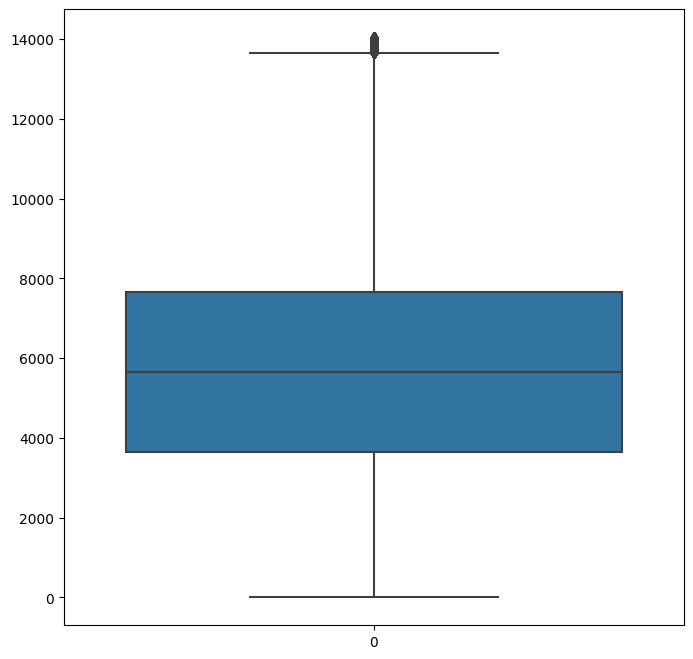

In [78]:
#The sales data after removing the outliers as it indicated bad data
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['Sales'])

<Axes: >

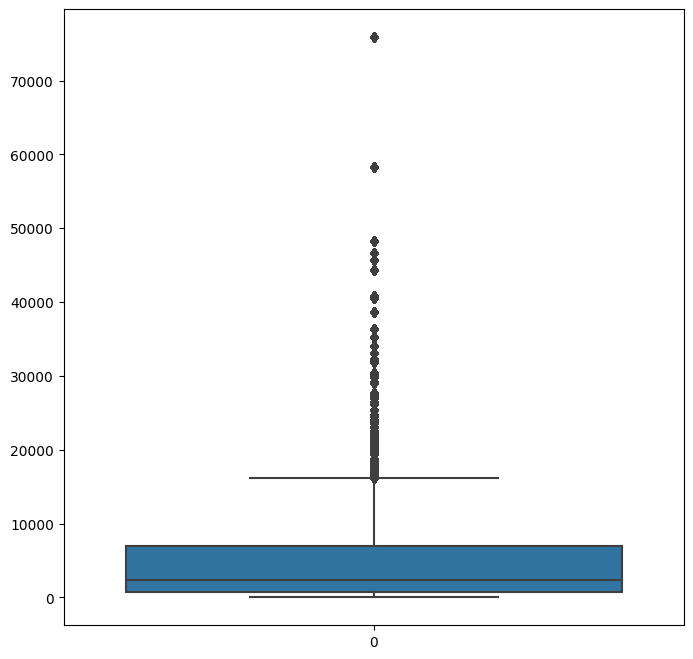

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['CompetitionDistance'])

In [80]:
 Q1 = np.percentile(df['CompetitionDistance'],25)
 Q2 = np.percentile(df['CompetitionDistance'],50)
 Q3 = np.percentile(df['CompetitionDistance'],75)
 IQR =  Q3 - Q1
 a=Q1-(1.5*IQR)
 b=Q3+(1.5*IQR)
 df=df[(df['CompetitionDistance']<b) & (df['CompetitionDistance']>a)]

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['CompetitionDistance'])

<Axes: >

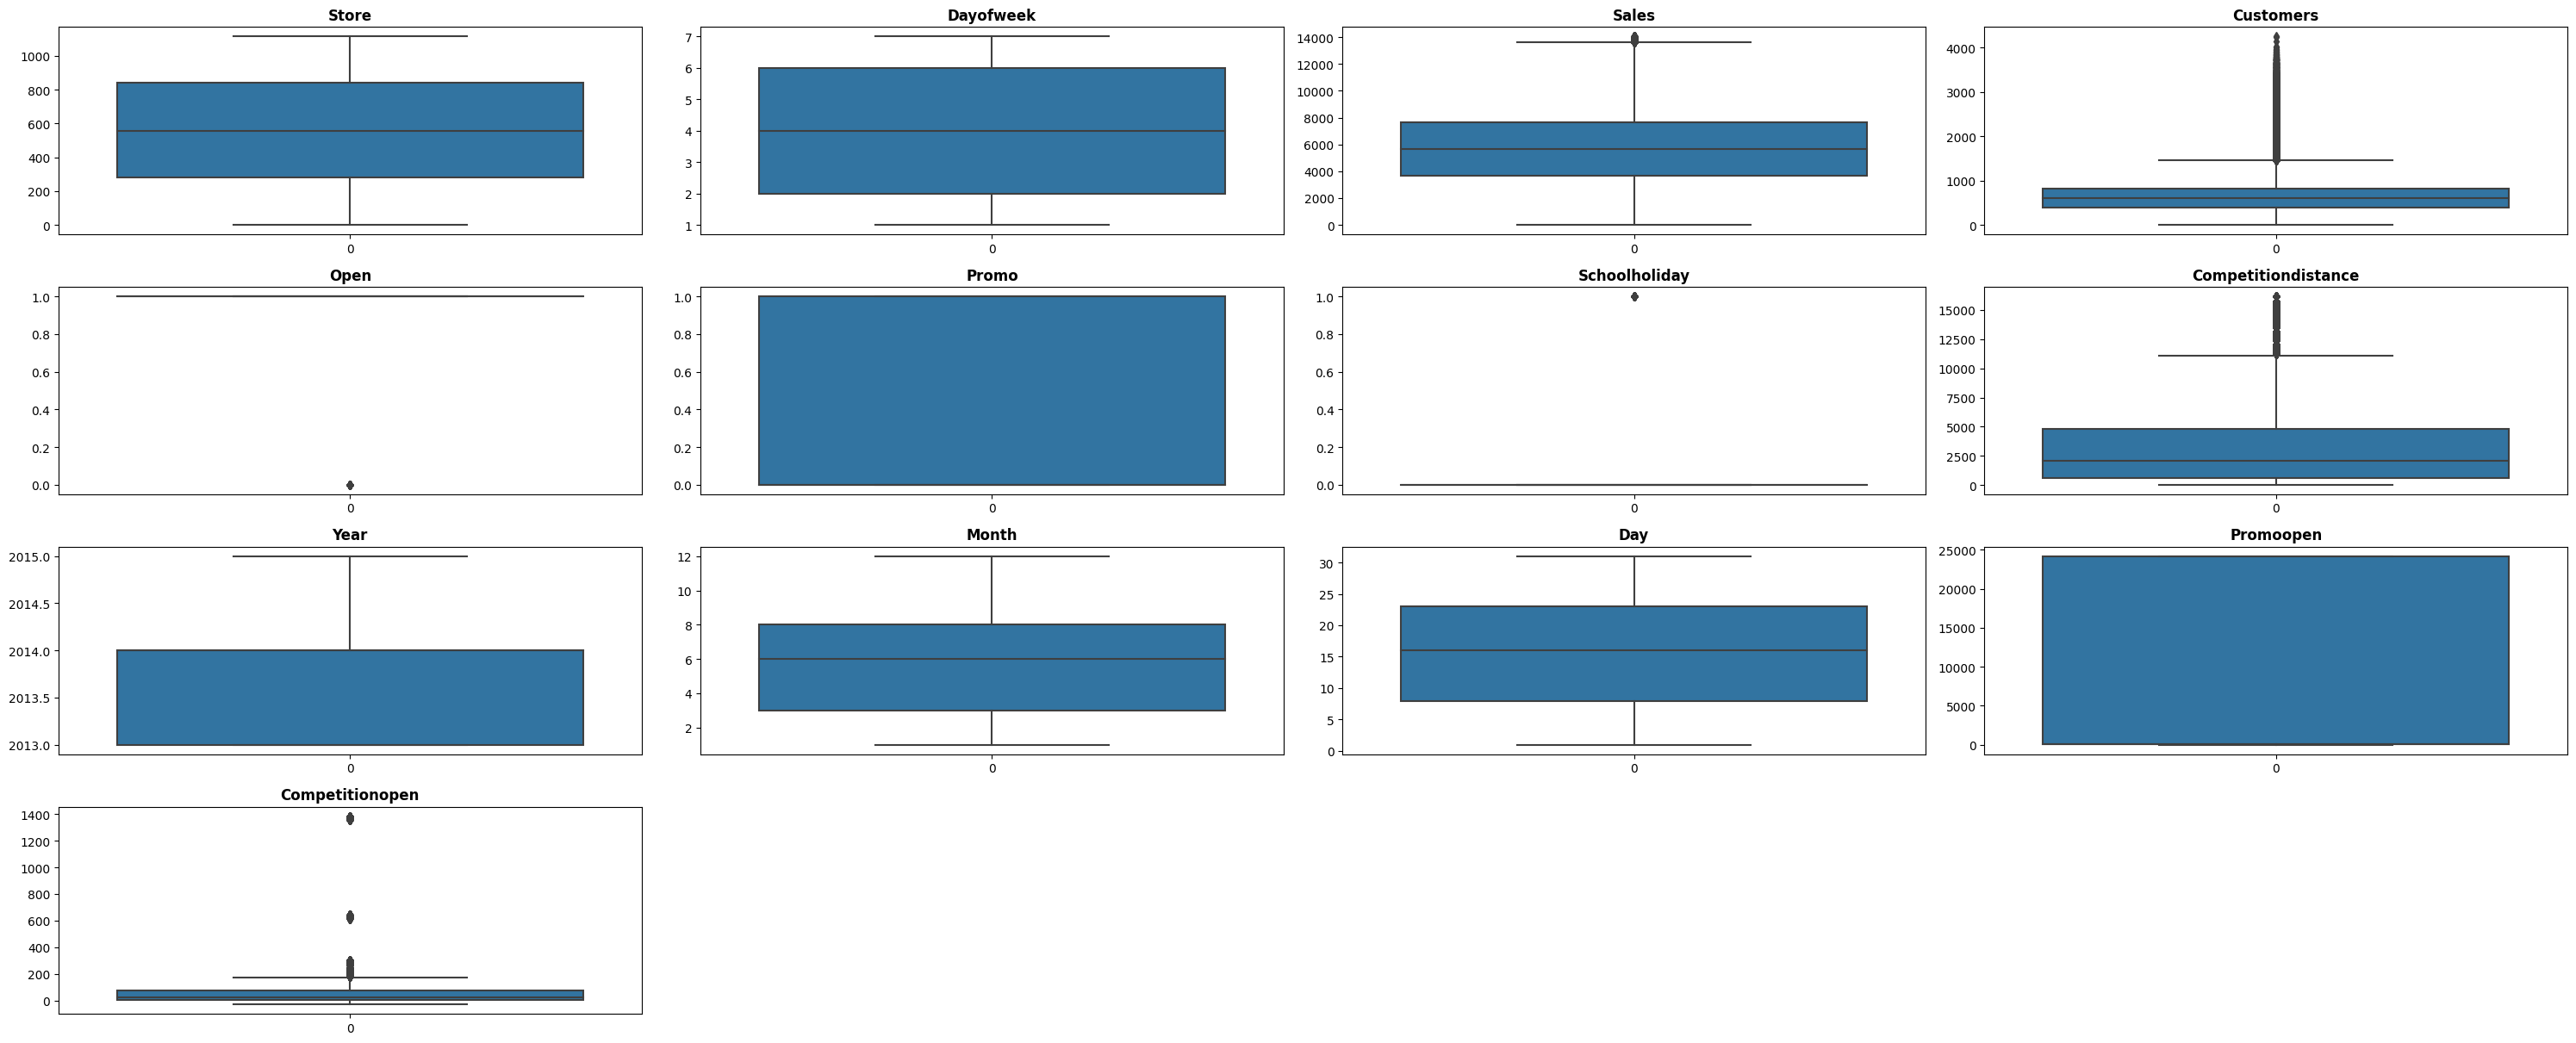

In [82]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(30,15))
for n,column in enumerate(df.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['Customers'])

<Axes: >

In [84]:
 Q1 = np.percentile(df['Customers'],25)
 Q2 = np.percentile(df['Customers'],50)
 Q3 = np.percentile(df['Customers'],75)
 IQR =  Q3 - Q1
 a=Q1-(1.5*IQR)
 b=Q3+(1.5*IQR)
 df=df[(df['Customers']<b) & (df['Customers']>a)]

In [85]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['Customers'])

<Axes: >

##### What all outlier treatment techniques have you used and why did you use those techniques?

we have used the IQR method to do the outlier treatment, because there where too many outliers present, for which log transformation is not an appropriate method

- The interquartile range (IQR) is a measure of dispersion that is used to identify and handle outliers in a dataset. It is defined as the difference between the 75th percentile and the 25th percentile of the data, and it is a robust measure of dispersion that is not affected by outliers.

### 3. Categorical Encoding

In [86]:
# Encode your categorical columns
#changing into boolean
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [87]:
df2 = pd.get_dummies(df, drop_first = True)
##pd.get_dummies() help you to do onehot encoding in single line of code,
##and we do drop first = true to prevent some dummy values and errors, so in below code cng is gone to prevent
## it from dummy var trap

In [88]:
df2.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5   5263        555     1      1              1   
1      1          4   5020        546     1      1              1   
2      1          3   4782        523     1      1              1   
3      1          2   5011        560     1      1              1   
4      1          1   6102        612     1      1              1   

   CompetitionDistance  Year  Month  ...  StateHoliday_1  StateHoliday_0  \
0               1270.0  2015      7  ...               0               1   
1               1270.0  2015      7  ...               0               1   
2               1270.0  2015      7  ...               0               1   
3               1270.0  2015      7  ...               0               1   
4               1270.0  2015      7  ...               0               1   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 23 columns]

In [89]:
df2['PromoOpen']

0          24187.0
1          24187.0
2          24187.0
3          24187.0
4          24187.0
            ...   
1017204        7.5
1017205        7.5
1017206        7.5
1017207        7.5
1017208        7.5
Name: PromoOpen, Length: 873200, dtype: float64

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. Label Encoding - Because we want to avoid the cretion of multiple columns
2. One Hot Encoding - Because of too many categories, label encoding is not possible

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#This involved selecting a subset of the available features to use in the model. This helped us to reduce complexity and improve the interpretability of the model, as well as potentially improving its performance.
#We have already completed feature manipulation above in this colab notebook and created 2 new features called PromoOpen and CompetitionOpen

#### 2. Feature Selection

In [90]:
# Select your features wisely to avoid overfitting
df2.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5   5263        555     1      1              1   
1      1          4   5020        546     1      1              1   
2      1          3   4782        523     1      1              1   
3      1          2   5011        560     1      1              1   
4      1          1   6102        612     1      1              1   

   CompetitionDistance  Year  Month  ...  StateHoliday_1  StateHoliday_0  \
0               1270.0  2015      7  ...               0               1   
1               1270.0  2015      7  ...               0               1   
2               1270.0  2015      7  ...               0               1   
3               1270.0  2015      7  ...               0               1   
4               1270.0  2015      7  ...               0               1   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 23 columns]

In [91]:
numerical_variables = ['Customers', 'CompetitionDistance', 'PromoOpen', 'CompetitionOpen']
categorical_variables = df2.columns.to_list()
categorical_variables

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Year',
 'Month',
 'Day',
 'PromoOpen',
 'CompetitionOpen',
 'StateHoliday_1',
 'StateHoliday_0',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [92]:
for i in numerical_variables:
  categorical_variables.remove(i)


In [93]:
categorical_variables.remove('Sales')

In [94]:
categorical_variables

['Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'StateHoliday_1',
 'StateHoliday_0',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [95]:
print('Numerical Variables are', numerical_variables)
print('Categorical Variables are', categorical_variables)

Numerical Variables are ['Customers', 'CompetitionDistance', 'PromoOpen', 'CompetitionOpen']
Categorical Variables are ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'StateHoliday_1', 'StateHoliday_0', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [96]:
# Transform Your data
df2.Open.value_counts()

1    716341
0    156859
Name: Open, dtype: int64

In [97]:
final_df = df2[df2.Open != 0]

In [98]:
final_df.Open.value_counts()

1    716341
Name: Open, dtype: int64

In [99]:
sns.distplot(x=final_df['Sales'])


<Axes: ylabel='Density'>

In [100]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  final_df['Sales'].hist(bins=50, ax = ax)
  ax.axvline(final_df['Sales'].mean(), color = 'pink',linestyle='dashed', linewidth=2)


In [101]:
final_df[final_df['Sales'] == float('-inf')]

Empty DataFrame
Columns: [Store, DayOfWeek, Sales, Customers, Open, Promo, SchoolHoliday, CompetitionDistance, Year, Month, Day, PromoOpen, CompetitionOpen, StateHoliday_1, StateHoliday_0, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, PromoInterval_Feb,May,Aug,Nov, PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec]
Index: []

[0 rows x 23 columns]

In [102]:
final_df.drop(final_df[final_df['Sales'] == float('-inf')].index, inplace=True)

In [103]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716341 entries, 0 to 1017207
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           716341 non-null  int64  
 1   DayOfWeek                       716341 non-null  int64  
 2   Sales                           716341 non-null  int64  
 3   Customers                       716341 non-null  int64  
 4   Open                            716341 non-null  int64  
 5   Promo                           716341 non-null  int64  
 6   SchoolHoliday                   716341 non-null  int64  
 7   CompetitionDistance             716341 non-null  float64
 8   Year                            716341 non-null  int64  
 9   Month                           716341 non-null  int64  
 10  Day                             716341 non-null  int64  
 11  PromoOpen                       716341 non-null  float64
 12  CompetitionOpen

In [104]:
final_df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5   5263        555     1      1              1   
1      1          4   5020        546     1      1              1   
2      1          3   4782        523     1      1              1   
3      1          2   5011        560     1      1              1   
4      1          1   6102        612     1      1              1   

   CompetitionDistance  Year  Month  ...  StateHoliday_1  StateHoliday_0  \
0               1270.0  2015      7  ...               0               1   
1               1270.0  2015      7  ...               0               1   
2               1270.0  2015      7  ...               0               1   
3               1270.0  2015      7  ...               0               1   
4               1270.0  2015      7  ...               0               1   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 23 columns]

In [105]:
categorical_variables

['Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'StateHoliday_1',
 'StateHoliday_0',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [106]:
numerical_variables

['Customers', 'CompetitionDistance', 'PromoOpen', 'CompetitionOpen']

### 6. Data Scaling

In [107]:
# Scaling your data
for i in numerical_variables:
  categorical_variables.append(i)
X = final_df[categorical_variables]
X

Store  DayOfWeek  Open  Promo  SchoolHoliday  Year  Month  Day  \
0            1          5     1      1              1  2015      7   31   
1            1          4     1      1              1  2015      7   30   
2            1          3     1      1              1  2015      7   29   
3            1          2     1      1              1  2015      7   28   
4            1          1     1      1              1  2015      7   27   
...        ...        ...   ...    ...            ...   ...    ...  ...   
1017202   1115          1     1      1              1  2013      1    7   
1017204   1115          6     1      0              1  2013      1    5   
1017205   1115          5     1      0              1  2013      1    4   
1017206   1115          4     1      0              1  2013      1    3   
1017207   1115          3     1      0              1  2013      1    2   

         StateHoliday_1  StateHoliday_0  ...  StoreType_d  Assortment_b  \
0                     0               1  ...            0             0   
1                     0               1  ...            0             0   
2                     0               1  ...            0             0   
3                     0               1  ...            0             0   
4                     0               1  ...            0             0   
...                 ...             ...  ...          ...           ...   
1017202               0               1  ...            1             0   
1017204               0               1  ...            1             0   
1017205               0               1  ...            1             0   
1017206               0               1  ...            1             0   
1017207               0               1  ...            1             0   

         Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
0                   0                              0   
1                   0                              0   
2                   0                              0   
3                   0                              0   
4                   0                              0   
...               ...                            ...   
1017202             1                              0   
1017204             1                              0   
1017205             1                              0   
1017206             1                              0   
1017207             1                              0   

         PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   
...                                ...                             ...   
1017202                              0                               1   
1017204                              0                               1   
1017205                              0                               1   
1017206                              0                               1   
1017207                              0                               1   

         Customers  CompetitionDistance  PromoOpen  CompetitionOpen  
0              555               1270.0    24187.0             82.0  
1              546               1270.0    24187.0             82.0  
2              523               1270.0    24187.0             82.0  
3              560               1270.0    24187.0             82.0  
4              612               1270.0    24187.0             82.0  
...            ...                  ...        ...              ...  
1017202        471               5350.0        7.5             -8.0  
1017204        339               5350.0        7.5             -8.0  
1017205        

In [108]:
y = final_df['Sales']

In [109]:
numerical_cols = ['Customers','CompetitionDistance','Year','Month','DayOfWeek','Day','CompetitionOpen','PromoOpen']
scaler = MinMaxScaler()
scaler.fit(final_df[numerical_cols])
final_df[numerical_cols] = scaler.transform(final_df[numerical_cols])

##### Which method have you used to scale you data and why?

- MinMax scaler will convert the data standardization

### 7. Data Splitting

In [110]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(573072, 22)
(143269, 22)


##### What data splitting ratio have you used and why?

- training set - 80%
- test set - 20%
### because we want to go by the standard norms

## ***7. ML Model Implementation***

In [111]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ML Model - 1 - Linear Regression

In [112]:
def Calculating_errors(y_train,y_pred_train,y_test,y_test_pred):
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is" ,MSE_test)
  MSE_train  = mean_squared_error(y_train, y_pred_train)
  print("MSE on train is" ,MSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is" ,RMSE_test)
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is" ,RMSE_train)
  print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
  print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

In [113]:
# ML Model - 1 Implementation
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [114]:
regressor.intercept_

-108891.46540335995

In [115]:
regressor.coef_

array([-8.14351621e+01, -7.51870825e+01, -4.66116035e-10,  9.96796804e+02,
        3.32548311e+01,  2.29183327e+02,  2.34816723e+02,  3.84062844e+01,
       -1.15482410e+02,  1.51979347e+02, -1.38212740e+03, -2.25546587e+02,
        1.05375886e+03, -3.29000172e+03,  2.88700819e+02,  1.08410655e+05,
        1.08519204e+05,  1.08311360e+05,  1.15103150e+04,  1.25128045e+03,
        1.08308411e+05,  6.53939665e+02])

In [116]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([5647.46019819, 6667.99818076, 4173.96762929, ..., 4745.95154326,
       6997.72587113, 8136.40843333])

In [117]:
y_train

933772    4839
788715    6767
840914    5047
418551    8900
28543     3450
          ... 
507322    2771
211865    9451
165443    4106
612281    6580
432027    9363
Name: Sales, Length: 573072, dtype: int64

In [118]:
y_pred = regressor.predict(X_test)
y_pred

array([ 8477.92937449, 10810.7941343 , 10352.99040332, ...,
        4844.35246637,  3669.753954  ,  6222.3599638 ])

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [119]:
r2_score(y_train, y_pred_train)  #training r2score

0.7938034578887937

In [120]:
r2_score(y_test, y_pred)     #testing r2 score

0.7926447980646957

In [121]:
Calculating_errors(y_train,y_pred_train,y_test, y_pred)

MSE on test is 1129235.277380796
MSE on train is 1128261.0629782786
RMSE on test is 1062.6548251341053
RMSE on train is 1062.1963391851239
Training MAE: 818.08
Test MAE: 819.19


In [122]:
# Generate predictions on the test data
predictions = regressor.predict(X_test)

# Calculate the evaluation score using a metric of your choice
# For example, let's use mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

# Plot the predictions against the ground truth labels
plt.plot(y_test, predictions, "bo")
plt.xlabel("Ground truth labels")
plt.ylabel("Predictions")

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [123]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [124]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -1128382.4343246236


In [125]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [126]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)


MSE : 1129235.3717524842
RMSE : 1062.6548695378403
R2 : 0.7926447807357467


In [127]:
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.7926129347168435


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement in adjusted r2 is seen

### ML Model - 2 - DecisionTreeRegression

In [128]:
# Visualizing evaluation Metric Score chart
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

In [129]:
tree_regressor = DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [130]:
y_pred_train = tree_regressor.predict(X_train)
y_pred_train

array([6136.31869802, 6736.9126795 , 5330.11705961, ..., 4580.24929698,
       5653.35203783, 7023.65058122])

In [131]:
y_pred_test = tree_regressor.predict(X_test)
y_pred_test

array([ 7791.55268851, 10865.61366088, 10865.61366088, ...,
        4580.24929698,  4175.56520878,  5653.35203783])

In [132]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [133]:
graph = Source(tree.export_graphviz(tree_regressor, out_file = None, feature_names= categorical_variables, filled = True))
display(SVG(graph.pipe(format='svg')))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [134]:
r2_score(y_train, y_pred_train)  #training r2score

0.7516753573281405

In [135]:
r2_score(y_test, y_pred_test)     #testing r2 score

0.7494874672210264

In [136]:
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.7494489930177597


In [137]:
Calculating_errors(y_train,y_pred_train,y_test, y_pred)

MSE on test is 1129235.277380796
MSE on train is 1358776.546085574
RMSE on test is 1062.6548251341053
RMSE on train is 1165.665709406249
Training MAE: 896.45
Test MAE: 819.19


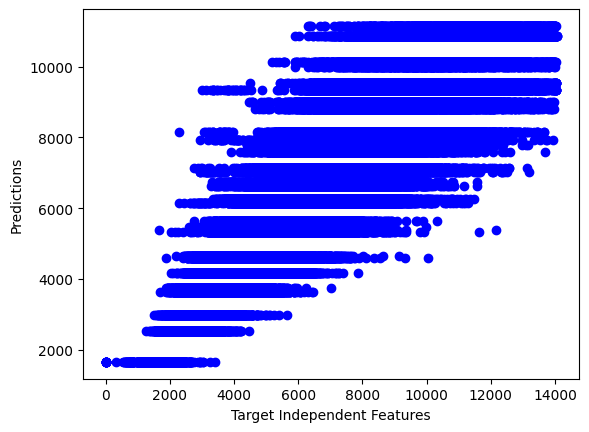

In [138]:
predictions = tree_regressor.predict(X_test)

# Calculate the evaluation score using a metric of your choice
# For example, let's use mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

# Plot the predictions against the ground truth labels
plt.plot(y_test, predictions, "bo")
plt.xlabel("Target Independent Features")
plt.ylabel("Predictions")

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [139]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model
model = DecisionTreeRegressor()

# Predict on the model

In [140]:
# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

In [141]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [142]:
y_pred_train = grid_search.predict(X_train)
y_pred_train

array([5865.01565941, 6735.41230366, 4409.49333906, ..., 4747.4402277 ,
       6428.93883162, 7250.5254726 ])

In [143]:
y_pred_test = grid_search.predict(X_test)
y_pred_test

array([ 6734.63848397, 10312.52068966, 10867.12905277, ...,
        4747.4402277 ,  4099.52946469,  6067.13551402])

In [144]:
r2_score(y_train, y_pred_train)  #training r2score

0.8446840334524288

In [145]:
r2_score(y_test, y_pred_test)  #testing r2score

0.8406809854703186

#### Explain each evaluation metric's indication towards business and the business impact of the ML model used.

As we can see that r2 score is about 74%. And we can conclude that business can predict future sales with the accuracy of 74%.

This machine learning model can be used to make predictions about future events or outcomes, such as sales forecasts. By understanding the predictive power of this model, a business can make informed decisions and take appropriate actions.

### ML Model - 3 - XgBoost Regression

In [146]:
xgb_reg = XGBRegressor()

In [147]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### 1. Explain each evaluation metric's indication towards business and the business impact of the ML model used?

In [148]:
print(f"The r2 score for testing is {round(r2_score(y_test,xgb_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,xgb_reg.predict(X_train)),4)}")

The r2 score for testing is 0.9592
The r2 score for training is 0.961


In [149]:
from sklearn.metrics import mean_absolute_error

In [150]:
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

Calculating_errors(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

MSE on test is 222399.03465534383
MSE on train is 213404.3199096645
RMSE on test is 471.59202140763983
RMSE on train is 461.9570541832482
Training MAE: 343.95
Test MAE: 350.30


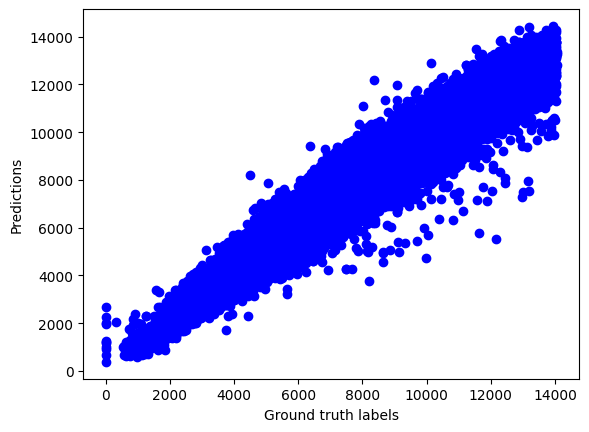

In [151]:
predictions = xgb_reg.predict(X_test)

# Calculate the evaluation score using a metric of your choice
# For example, let's use mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

# Plot the predictions against the ground truth labels
plt.plot(y_test, predictions, "bo")
plt.xlabel("Ground truth labels")
plt.ylabel("Predictions")

# Show the plot
plt.show()

Businesses can predict their sales with 84% accuracy with this model.

#### 2. Cross Validation and Hyperparameter Tuning

### ML Model - 4 - RandomForestRegression

In [152]:
rf = RandomForestRegressor()

In [153]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [154]:
print(f"The r2 score for testing is {round(r2_score(y_test,rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,rf.predict(X_train)),4)}")

The r2 score for testing is 0.9684
The r2 score for training is 0.9956


In [155]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [156]:
Calculating_errors(y_train,y_train_pred_rf,y_test,y_test_pred_rf)

MSE on test is 172012.69903335682
MSE on train is 24335.865054180453
RMSE on test is 414.74413682818573
RMSE on train is 155.999567480748
Training MAE: 110.62
Test MAE: 297.04


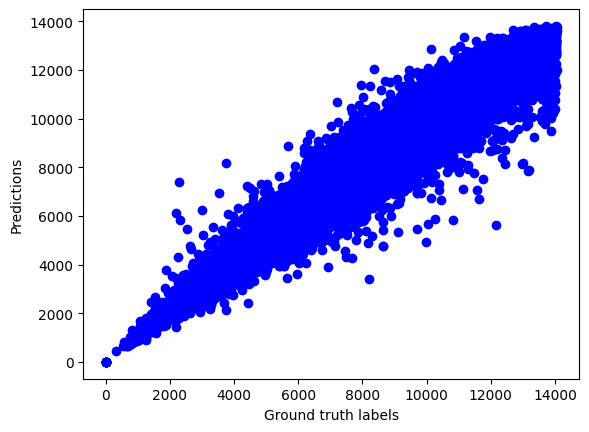

In [157]:
# Generate predictions on the test data
predictions = rf.predict(X_test)

# Calculate the evaluation score using a metric of your choice
# For example, let's use mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

# Plot the predictions against the ground truth labels
plt.plot(y_test, predictions, "bo")
plt.xlabel("Ground truth labels")
plt.ylabel("Predictions")
# Show the plot
plt.show()

#### Which Evaluation metrics did you consider for a positive business impact and why?

Here we got r2 score of 96.8% for testing data which means that business can predict their future sales with 96.8% accuracy.

###  Which ML model did you choose from the above created models as your final

### prediction model and why?

Here we got best accuracy from Random Forest Regression. So this model could help businesses to predict their future sales data.

### Explain the model which you have used and the feature importance using any model explainability tool?

In [158]:
importance = rf.feature_importances_
importance

array([4.95609686e-02, 1.36879828e-02, 0.00000000e+00, 5.36709018e-02,
       8.49593319e-04, 1.34327769e-03, 6.15396753e-03, 7.66829085e-03,
       4.45245549e-05, 4.26244577e-04, 3.00063839e-03, 2.81652464e-03,
       6.96256712e-02, 9.36327355e-03, 7.14747178e-03, 2.08247726e-03,
       4.43101919e-03, 1.88845550e-03, 6.51401166e-01, 7.33163424e-02,
       1.96341420e-02, 2.18870667e-02])

In [159]:
feature_names = list(X.columns)

In [160]:
rf_imp = pd.DataFrame(columns = ['Variable','Importance'])
rf_imp.Variable = feature_names
rf_imp.Importance = importance*100
rf_imp

Variable  Importance
0                            Store    4.956097
1                        DayOfWeek    1.368798
2                             Open    0.000000
3                            Promo    5.367090
4                    SchoolHoliday    0.084959
5                             Year    0.134328
6                            Month    0.615397
7                              Day    0.766829
8                   StateHoliday_1    0.004452
9                   StateHoliday_0    0.042624
10                     StoreType_b    0.300064
11                     StoreType_c    0.281652
12                     StoreType_d    6.962567
13                    Assortment_b    0.936327
14                    Assortment_c    0.714747
15   PromoInterval_Feb,May,Aug,Nov    0.208248
16   PromoInterval_Jan,Apr,Jul,Oct    0.443102
17  PromoInterval_Mar,Jun,Sept,Dec    0.188846
18                       Customers   65.140117
19             CompetitionDistance    7.331634
20                       PromoOpen    1.963414
21                 CompetitionOpen    2.188707

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Rossmann dataset is a large dataset of sales data for a chain of German pharmacies. The dataset includes over a million rows of data, with various features such as store location, type of product sold, and various sales metrics.
In a machine learning project using the Rossmann dataset, you would likely start by exploring the data and trying to understand the relationships between different features and sales outcomes. You might also want to perform some data cleaning and preprocessing to ensure that the data is ready for modeling.
Once you have prepared the data, you could use a variety of machine learning algorithms to build models that predict sales outcomes based on the available features. Some common approaches might include linear regression, decision trees, or random forests. You could also use more advanced techniques such as gradient boosting or neural networks whcih are beyond the scope of this present project and surely be included in future.
Ultimately, the conclusion of a machine learning project using the Rossmann dataset would depend on the specific goals and objectives of the project. However, a common goal might be to build a model that is able to accurately predict sales outcomes based on the available features, and to use that model to make informed decisions about how to optimize sales and improve business performance.


### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***